In [83]:
import pandas as pd

dfp = pd.read_excel(r"C:\Users\kian3\OneDrive - KU Leuven\Documents\lessen\MDA\Project\cordis-HORIZONprojects-xlsx\project.xlsx")
dfo = pd.read_excel(r"C:\Users\kian3\MDA\Project\cordis-HORIZONprojects-xlsx\organization.xlsx")

In [7]:
import pandas as pd
#dfoutput1 = pd.read_excel(r"C:\Users\kian3\OneDrive - KU Leuven\Documents\lessen\MDA\Project\project_output_part_1.xlsx")
#dfoutput2 = pd.read_excel(r"C:\Users\kian3\OneDrive - KU Leuven\Documents\lessen\MDA\Project\project_output_part_2.xlsx")
# Originally, the output was saved in two parts. There ware some missings on the domains.
# This file, has the projects with originally missing domains
# dfoutput3 = pd.read_excel(r"C:\Users\kian3\OneDrive - KU Leuven\Documents\lessen\MDA\Project\missing_domains_final.xlsx")
# Corrected file 
dfoutput = pd.read_excel(r"C:\Users\kian3\MDA\Project\project_output.xlsx")

In [ ]:
# dfoutput3_uniqueid = dfoutput3['id'].unique()
# df_full_output= pd.concat([dfoutput1, dfoutput2], axis=0, ignore_index=True, verify_integrity=True)
# print(df_full_output)
# Leaves out the projects with originally missing domains
# df_full_output_no_missings = df_full_output[~df_full_output['id'].isin(dfoutput3_uniqueid)]
# The projects with originally missing domains are added to the dataframe with correct domains
# df_full_output = pd.concat([df_full_output_no_missings, dfoutput3], axis=0, ignore_index=True, verify_integrity=True)


              id                                          objective  \
0      101116741  How do longstanding, primarily non-industrial,...   
1      101163161  The James Webb Space Telescope (JWST) has ushe...   
2      101160499  The spatiotemporal organization of the cell ma...   
3      101166905  The Milky Way is the cosmic environment in whi...   
4      101162875  Cellular organisms are complex machines whose ...   
...          ...                                                ...   
15336  101114220  The primary objective of the work performed wi...   
15337  101114193  Bibi Blomqvist co-founder and COO of Cogo ApS....   
15338  101114191  In Women TechEU, HORIZER aims, over the next 9...   
15339  101114035  A product recall is the process of retrieving ...   
15340  101121353  Engage2innovate (E2i) will investigate and add...   

                                             main_topics  \
0      ['digital technologies', 'economic diversity',...   
1      ['Astrochemistry', '

In [84]:
# Check if missings domain are gone, issue scientific domains solved
print(dfoutput["scientific_domain"].isna().sum())
print(dfoutput[dfoutput["scientific_domain"].isna()])

0
Empty DataFrame
Columns: [id, objective, main_topics, scientific_domain, problem_type, expected_impact, sustainability, semantic_summary]
Index: []


In [85]:
print(dfo.head())

   projectID projectAcronym  organisationID       vatNumber  \
0  101116741            DOE       999981634  NL811383696B01   
1  101163161        IRASTRO       999997736      DK31119103   
2  101163161        IRASTRO       999854855     DE138408327   
3  101163161        IRASTRO       999990267     DE129517720   
4  101160499       In-phase       999874546     ESQ2818014I   

                                                name shortName    SME  \
0                              WAGENINGEN UNIVERSITY        WU  False   
1                                 AARHUS UNIVERSITET        AU  False   
2                               UNIVERSITAET POTSDAM        UP  False   
3  MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISS...       MPG  False   
4                  UNIVERSIDAD COMPLUTENSE DE MADRID       UCM  False   

  activityType                street postCode  ...  \
0          HES  DROEVENDAALSESTEEG 4  6708 PB  ...   
1          HES     NORDRE RINGGADE 1     8000  ...   
2          HES   AM 

In [86]:
print(dfp.shape)
print(dfo.shape)
# One to one merge dfp and df_full_output
newdf = dfp.merge(dfoutput, on="id")
### One to many merge newdf and dfo, excpect 100249 rows in fulldf
fulldf = newdf.merge(dfo, left_on="id", right_on="projectID", validate="one_to_many")
print(fulldf)

(15341, 20)
(100249, 25)
               id   acronym  status  \
0       101116741       DOE  SIGNED   
1       101163161   IRASTRO  SIGNED   
2       101163161   IRASTRO  SIGNED   
3       101163161   IRASTRO  SIGNED   
4       101160499  In-phase  SIGNED   
...           ...       ...     ...   
100244  101121353       E2i  SIGNED   
100245  101121353       E2i  SIGNED   
100246  101121353       E2i  SIGNED   
100247  101121353       E2i  SIGNED   
100248  101121353       E2i  SIGNED   

                                                    title   startDate  \
0       Digitizing Other Economies: A Comparative Appr...  2024-02-01   
1       MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...  2025-08-01   
2       MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...  2025-08-01   
3       MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...  2025-08-01   
4       Multiscale modelling of aberrant phase transit...  2025-06-01   
...                                                   ...         ..

In [87]:
print(dfoutput["scientific_domain"].isna().sum()) #Still oke
print(fulldf.head())
print(fulldf.info())

0
          id   acronym  status  \
0  101116741       DOE  SIGNED   
1  101163161   IRASTRO  SIGNED   
2  101163161   IRASTRO  SIGNED   
3  101163161   IRASTRO  SIGNED   
4  101160499  In-phase  SIGNED   

                                               title   startDate     endDate  \
0  Digitizing Other Economies: A Comparative Appr...  2024-02-01  2029-01-31   
1  MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...  2025-08-01  2031-07-31   
2  MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...  2025-08-01  2031-07-31   
3  MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...  2025-08-01  2031-07-31   
4  Multiscale modelling of aberrant phase transit...  2025-06-01  2030-05-31   

  totalCost_x ecMaxContribution   legalBasis        topics  ...  \
0     1499998           1499998  HORIZON.1.1  ERC-2023-STG  ...   
1    12085363          12085363  HORIZON.1.1  ERC-2024-SyG  ...   
2    12085363          12085363  HORIZON.1.1  ERC-2024-SyG  ...   
3    12085363          12085363  HORIZON.1.1

In [88]:
# Delete active and nature (empty)
fulldf = fulldf.drop(columns=["active", "nature"])

In [89]:
print(fulldf.head())
print(fulldf.info())
print(fulldf.shape)
print(fulldf.describe())

          id   acronym  status  \
0  101116741       DOE  SIGNED   
1  101163161   IRASTRO  SIGNED   
2  101163161   IRASTRO  SIGNED   
3  101163161   IRASTRO  SIGNED   
4  101160499  In-phase  SIGNED   

                                               title   startDate     endDate  \
0  Digitizing Other Economies: A Comparative Appr...  2024-02-01  2029-01-31   
1  MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...  2025-08-01  2031-07-31   
2  MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...  2025-08-01  2031-07-31   
3  MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...  2025-08-01  2031-07-31   
4  Multiscale modelling of aberrant phase transit...  2025-06-01  2030-05-31   

  totalCost_x ecMaxContribution   legalBasis        topics  ...  \
0     1499998           1499998  HORIZON.1.1  ERC-2023-STG  ...   
1    12085363          12085363  HORIZON.1.1  ERC-2024-SyG  ...   
2    12085363          12085363  HORIZON.1.1  ERC-2024-SyG  ...   
3    12085363          12085363  HORIZON.1.1  

In [90]:
# To save memory and speed ML training save categorical variables as category datatype
print(fulldf["status"].dtype)
print(fulldf["status"].nbytes)
fulldf["status"] = fulldf["status"].astype("category")
print(fulldf["status"].nbytes)
fulldf["status"].dtype

object
801992
100273


CategoricalDtype(categories=['CLOSED', 'SIGNED', 'TERMINATED'], ordered=False, categories_dtype=object)

In [91]:
# Can be used to include features about the amount of coordinators, participants, ... of a project
print(fulldf["role"].dtype)
print(fulldf["role"].nbytes)
fulldf["role"] = fulldf["role"].astype("category")
print(fulldf["role"].nbytes)
fulldf["role"].dtype

object
801992
100281


CategoricalDtype(categories=['associatedPartner', 'coordinator', 'participant',
                  'thirdParty'],
, ordered=False, categories_dtype=object)

In [92]:
# 15 different levels, maybe add as a feature?
print(fulldf["legalBasis"].dtype)
print(fulldf["legalBasis"].nbytes)
fulldf["legalBasis"] = fulldf["legalBasis"].astype("category")
print(fulldf["legalBasis"].nbytes)
fulldf["legalBasis"].dtype

object
801992
100369


CategoricalDtype(categories=['EURATOM2027', 'HORIZON.1.1', 'HORIZON.1.2', 'HORIZON.1.3',
                  'HORIZON.2.1', 'HORIZON.2.2', 'HORIZON.2.3', 'HORIZON.2.4',
                  'HORIZON.2.5', 'HORIZON.2.6', 'HORIZON.3.1', 'HORIZON.3.2',
                  'HORIZON.3.3', 'HORIZON.4.1', 'HORIZON.4.2'],
, ordered=False, categories_dtype=object)

In [93]:
# too many, only use our topic feature
print(fulldf["topics"].dtype)
print(fulldf["topics"].nbytes)
fulldf["topics"] = fulldf["topics"].astype("category")
print(fulldf["topics"].nbytes)
fulldf["topics"].dtype

object
801992
216842


CategoricalDtype(categories=['ERC-2021-ADG', 'ERC-2021-COG', 'ERC-2021-STG',
                  'ERC-2022-ADG', 'ERC-2022-COG', 'ERC-2022-POC1',
                  'ERC-2022-POC2', 'ERC-2022-STG', 'ERC-2022-SyG',
                  'ERC-2023-ADG',
                  ...
                  'HORIZON-WIDERA-2024-ERA-01-01',
                  'HORIZON-WIDERA-2024-ERA-01-03',
                  'HORIZON-WIDERA-2024-ERA-01-04',
                  'HORIZON-WIDERA-2024-ERA-01-07',
                  'HORIZON-WIDERA-2024-ERA-01-08',
                  'HORIZON-WIDERA-2024-ERA-01-09',
                  'HORIZON-WIDERA-2024-ERA-01-11',
                  'HORIZON-WIDERA-2024-ERA-01-12',
                  'HORIZON-WIDERA-2024-EUCYS-IBA',
                  'HORIZON-WIDERA-2024-WIRE-IBA'],
, ordered=False, categories_dtype=object)

In [94]:
# one category, will be dropped as it is not informative
print(fulldf["frameworkProgramme"].dtype)
print(fulldf["frameworkProgramme"].nbytes)
fulldf["frameworkProgramme"] = fulldf["frameworkProgramme"].astype("category")
print(fulldf["frameworkProgramme"].nbytes)
fulldf["frameworkProgramme"].dtype
fulldf = fulldf.drop(columns=["frameworkProgramme"])

object
801992
100257


In [95]:
# Also too many levels, looks like topics (test dubble columns later)
print(fulldf["masterCall"].dtype)
print(fulldf["masterCall"].nbytes)
fulldf["masterCall"] = fulldf["masterCall"].astype("category")
print(fulldf["masterCall"].nbytes)
fulldf["masterCall"].dtype


object
801992
204402


CategoricalDtype(categories=['ERC-2021-ADG', 'ERC-2021-COG', 'ERC-2021-STG',
                  'ERC-2022-ADG', 'ERC-2022-COG', 'ERC-2022-POC1',
                  'ERC-2022-POC2', 'ERC-2022-STG', 'ERC-2022-SYG',
                  'ERC-2023-ADG',
                  ...
                  'HORIZON-WIDERA-2023-ESOF-IBA',
                  'HORIZON-WIDERA-2023-EU-CECR-IBA',
                  'HORIZON-WIDERA-2023-EUCYS-IBA',
                  'HORIZON-WIDERA-2023-RESAVER-IBA',
                  'HORIZON-WIDERA-2023-TALENTS-01',
                  'HORIZON-WIDERA-2023-TALENTS-02',
                  'HORIZON-WIDERA-2024-COST-SGA', 'HORIZON-WIDERA-2024-ERA-01',
                  'HORIZON-WIDERA-2024-EUCYS-IBA',
                  'HORIZON-WIDERA-2024-WIRE-IBA'],
, ordered=False, categories_dtype=object)

In [96]:
# Also too many levels, looks like topics and mastercall (test dubble columns later)
print(fulldf["subCall"].dtype)
print(fulldf["subCall"].nbytes)
fulldf["subCall"] = fulldf["subCall"].astype("category")
print(fulldf["subCall"].nbytes)
fulldf["subCall"].dtype

object
801992
204402


CategoricalDtype(categories=['ERC-2021-ADG', 'ERC-2021-COG', 'ERC-2021-STG',
                  'ERC-2022-ADG', 'ERC-2022-COG', 'ERC-2022-POC1',
                  'ERC-2022-POC2', 'ERC-2022-STG', 'ERC-2022-SYG',
                  'ERC-2023-ADG',
                  ...
                  'HORIZON-WIDERA-2023-ESOF-IBA',
                  'HORIZON-WIDERA-2023-EU-CECR-IBA',
                  'HORIZON-WIDERA-2023-EUCYS-IBA',
                  'HORIZON-WIDERA-2023-RESAVER-IBA',
                  'HORIZON-WIDERA-2023-TALENTS-01',
                  'HORIZON-WIDERA-2023-TALENTS-02',
                  'HORIZON-WIDERA-2024-COST-SGA', 'HORIZON-WIDERA-2024-ERA-01',
                  'HORIZON-WIDERA-2024-EUCYS-IBA',
                  'HORIZON-WIDERA-2024-WIRE-IBA'],
, ordered=False, categories_dtype=object)

In [97]:
# +30 cat's but looks like there is a lot of subschemes (ERC, EURATOM, HORIZON, EI...)
print(fulldf["fundingScheme"].dtype)
print(fulldf["fundingScheme"].nbytes)
fulldf["fundingScheme"] = fulldf["fundingScheme"].astype("category")
print(fulldf["fundingScheme"].nbytes)
fulldf["fundingScheme"].dtype

object
801992
100561


CategoricalDtype(categories=['CSA', 'EIC', 'EIC-ACC', 'ERC', 'ERC-POC', 'ERC-SYG',
                  'EURATOM-COFUND', 'EURATOM-CSA', 'EURATOM-IA', 'EURATOM-RIA',
                  'HORIZON-AG', 'HORIZON-AG-LS', 'HORIZON-AG-UN',
                  'HORIZON-COFUND', 'HORIZON-CSA', 'HORIZON-EIC',
                  'HORIZON-EIC-ACC', 'HORIZON-EIC-ACC-BF', 'HORIZON-EIT-KIC',
                  'HORIZON-ERC', 'HORIZON-ERC-POC', 'HORIZON-ERC-SYG',
                  'HORIZON-IA', 'HORIZON-JU-CSA', 'HORIZON-JU-IA',
                  'HORIZON-JU-RIA', 'HORIZON-PCP', 'HORIZON-RIA',
                  'HORIZON-TMA-MSCA-Cofund-D', 'HORIZON-TMA-MSCA-Cofund-P',
                  'HORIZON-TMA-MSCA-DN', 'HORIZON-TMA-MSCA-DN-ID',
                  'HORIZON-TMA-MSCA-DN-JD', 'HORIZON-TMA-MSCA-PF-EF',
                  'HORIZON-TMA-MSCA-PF-GF', 'HORIZON-TMA-MSCA-SE', 'IA',
                  'MSCA-PF', 'RIA'],
, ordered=False, categories_dtype=object)

In [98]:
# possible feature if we want to do something with the originizations activity types
print(fulldf["activityType"].dtype)
print(fulldf["activityType"].nbytes)
fulldf["activityType"] = fulldf["activityType"].astype("category")
print(fulldf["activityType"].nbytes)
fulldf["activityType"].dtype

object
801992
100289


CategoricalDtype(categories=['HES', 'OTH', 'PRC', 'PUB', 'REC'], ordered=False, categories_dtype=object)

In [99]:
# Maybe if we want to group variables in region and then check influence on funding? Or put on a worldmap?
# Can also use the column nutscode, EU's nomenclature for deviding in statistical regions, see next cell
print(fulldf["country"].dtype)
print(fulldf["country"].nbytes)
fulldf["country"] = fulldf["country"].astype("category")
print(fulldf["country"].nbytes)
fulldf["country"].dtype

object
801992
201866


CategoricalDtype(categories=['AD', 'AE', 'AF', 'AI', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU',
                  ...
                  'US', 'UY', 'UZ', 'VA', 'VE', 'VN', 'XK', 'ZA', 'ZM', 'ZW'],
, ordered=False, categories_dtype=object)

In [100]:
# A lot, better to group on country level maybe?
print(fulldf["nutsCode"].dtype)
print(fulldf["nutsCode"].nbytes)
fulldf["nutsCode"] = fulldf["nutsCode"].astype("category")
print(fulldf["nutsCode"].nbytes)
fulldf["nutsCode"].dtype

object
801992
212130


CategoricalDtype(categories=['AD', 'AE', 'AF', 'AI', 'AL', 'AL012', 'AL022', 'AM', 'AO',
                  'AR',
                  ...
                  'US', 'UY', 'UZ', 'VA', 'VE', 'VN', 'XK', 'ZA', 'ZM', 'ZW'],
, ordered=False, categories_dtype=object)

In [101]:
print(fulldf["main_topics"].dtype)
print(fulldf["main_topics"].nbytes)
fulldf["main_topics"] = fulldf["main_topics"].astype("category")
print(fulldf["main_topics"].nbytes)
fulldf["main_topics"].dtype

object
801992
322666


CategoricalDtype(categories=['["Alzheimer's Disease", 'Genetics', 'Neurodegeneration', 'PET Imaging']',
                  '["Alzheimer's Disease", 'Neurodegeneration', 'Drug Development']',
                  '["Alzheimer's Disease", 'Point of Care Testing', 'Cognitive Impairment']',
                  '["Alzheimer's disease diagnostics", 'Blood-based biomarkers']',
                  '["Alzheimer's disease diagnostics", 'plasma biomarkers', 'digital cognitive tests']',
                  '["Alzheimer's disease pathogenesis", 'immune system interactions', 'bioactive lipids']',
                  '["Alzheimer's disease pathology", 'Neuroinflammation', 'Microglia subpopulations']',
                  '["Alzheimer's disease research", 'Gene therapy', 'Nanocarriers']',
                  '["Alzheimer's disease", 'Amyloid-beta protein', 'Neuroinflammation', 'Neurodegeneration']',
                  '["Alzheimer's disease", 'Nasu-Hakola disease', 'microglia dysfunction', 'TREM2 expression']',
      

In [102]:
# Still a lot, maybe group further like 'urban planning', 'urban studies' as urban
print(fulldf["scientific_domain"].dtype)
print(fulldf["scientific_domain"].nbytes)
fulldf[" scientific_domain"] = fulldf["scientific_domain"].astype("category")
print(fulldf["scientific_domain"].nbytes)
fulldf[" scientific_domain"].dtype

object
801992
801992


CategoricalDtype(categories=['aeronautics', 'aerospace engineering',
                  'agricultural science', 'anthropology', 'archaeology',
                  'architecture', 'artificial intelligence',
                  'arts and humanities', 'astronomy', 'astrophysics',
                  'biochemistry', 'biology', 'biomedical', 'biophysics',
                  'biotechnology', 'business and innovation',
                  'chemical engineering', 'chemistry', 'climate science',
                  'cognitive science', 'computer science', 'confidential',
                  'cultural studies', 'earth sciences', 'ecology', 'economics',
                  'education', 'energy', 'engineering',
                  'environmental engineering', 'environmental science',
                  'food science', 'genetics', 'geology', 'geophysics',
                  'geoscience', 'health science', 'healthcare', 'history',
                  'information technology', 'interdisciplinary', 'law',
                 

In [103]:
# Some with upper case some without, convert this to capitalized categories
print(fulldf["problem_type"].dtype)
print(fulldf["problem_type"].nbytes)
fulldf["problem_type"] = fulldf["problem_type"].astype("category")
print(fulldf["problem_type"].nbytes)
fulldf["problem_type"].dtype

object
801992
100329


CategoricalDtype(categories=['Applied Research', 'Applied research', 'Confidential',
                  'Fundamental Research', 'Fundamental research',
                  'Translational Research', 'Translational research',
                  'applied research', 'fundamental research',
                  'translational research'],
, ordered=False, categories_dtype=object)

In [104]:
# some with 1, some 2 ... maybe make 1 or try to have all 2 or 3 for example? (the more the more categories)
print(fulldf["expected_impact"].dtype)
print(fulldf["expected_impact"].nbytes)
fulldf["expected_impact"] = fulldf["expected_impact"].astype("category")
print(fulldf["expected_impact"].nbytes)
fulldf["expected_impact"].dtype

object
801992
100841


CategoricalDtype(categories=['Confidential', 'Societal',
                  '['Societal', 'Economic', 'Environmental']',
                  '['Societal', 'Economic']',
                  '['Societal', 'Environmental', 'Economic']',
                  '['Societal', 'Environmental']',
                  '['Societal', 'Technological', 'Economic']',
                  '['Societal', 'Technological', 'Environmental', 'Economic']',
                  '['Societal', 'Technological', 'Environmental']',
                  '['Societal', 'Technological']', '['Societal']',
                  '['Technological', 'Economic']',
                  '['Technological', 'Environmental']',
                  '['Technological', 'Societal']',
                  '['economic', 'environmental']', '['economic', 'societal']',
                  '['economic', 'technological', 'societal']', '['economic']',
                  '['environmental', 'economic']',
                  '['environmental', 'societal']',
                  '['env

In [105]:
# Drop the columns we will probably not use for prediction
# Geographical columns can be used later if we want to do geographical clustering for example
fulldf = fulldf.drop(columns=["acronym", "title", "totalCost_x", "topics", "objective_x", "rcn_x", "grantDoi", "contentUpdateDate_x", \
                              "projectID", "projectAcronym", "organisationID", "vatNumber", "name", "shortName", "street", "postCode", \
                              "city", "geolocation", "organizationURL", "contactForm","contentUpdateDate_y", "rcn_y", "totalCost_y", \
                              "ecContribution", "netEcContribution", "ecSignatureDate", "masterCall", "subCall", " scientific_domain"])

In [106]:
print(fulldf["scientific_domain"].isna().sum()) # Still oke
print(fulldf.head())
print(fulldf.info())
print(fulldf.shape)
print(fulldf.describe())

0
          id  status   startDate     endDate ecMaxContribution   legalBasis  \
0  101116741  SIGNED  2024-02-01  2029-01-31           1499998  HORIZON.1.1   
1  101163161  SIGNED  2025-08-01  2031-07-31          12085363  HORIZON.1.1   
2  101163161  SIGNED  2025-08-01  2031-07-31          12085363  HORIZON.1.1   
3  101163161  SIGNED  2025-08-01  2031-07-31          12085363  HORIZON.1.1   
4  101160499  SIGNED  2025-06-01  2030-05-31           1489128  HORIZON.1.1   

     fundingScheme                                        objective_y  \
0      HORIZON-ERC  How do longstanding, primarily non-industrial,...   
1  HORIZON-ERC-SYG  The James Webb Space Telescope (JWST) has ushe...   
2  HORIZON-ERC-SYG  The James Webb Space Telescope (JWST) has ushe...   
3  HORIZON-ERC-SYG  The James Webb Space Telescope (JWST) has ushe...   
4      HORIZON-ERC  The spatiotemporal organization of the cell ma...   

                                         main_topics scientific_domain  ...  \
0  ['

In [107]:
fulldf["ecMaxContribution"] = fulldf["ecMaxContribution"].str.replace(',', '.', regex=False).astype(float)

In [108]:
print(fulldf.head())
print(fulldf.info())
print(fulldf.shape)
print(fulldf.describe())

          id  status   startDate     endDate  ecMaxContribution   legalBasis  \
0  101116741  SIGNED  2024-02-01  2029-01-31          1499998.0  HORIZON.1.1   
1  101163161  SIGNED  2025-08-01  2031-07-31         12085363.0  HORIZON.1.1   
2  101163161  SIGNED  2025-08-01  2031-07-31         12085363.0  HORIZON.1.1   
3  101163161  SIGNED  2025-08-01  2031-07-31         12085363.0  HORIZON.1.1   
4  101160499  SIGNED  2025-06-01  2030-05-31          1489128.0  HORIZON.1.1   

     fundingScheme                                        objective_y  \
0      HORIZON-ERC  How do longstanding, primarily non-industrial,...   
1  HORIZON-ERC-SYG  The James Webb Space Telescope (JWST) has ushe...   
2  HORIZON-ERC-SYG  The James Webb Space Telescope (JWST) has ushe...   
3  HORIZON-ERC-SYG  The James Webb Space Telescope (JWST) has ushe...   
4      HORIZON-ERC  The spatiotemporal organization of the cell ma...   

                                         main_topics scientific_domain  ...  \
0

In [109]:
fulldf["SME"] = fulldf["SME"].astype(bool)

In [110]:
fulldf["SME"] = fulldf["SME"].astype(int)

In [111]:
fulldf["startDate"] = pd.to_datetime(fulldf["startDate"])
fulldf["endDate"] = pd.to_datetime(fulldf["endDate"])

In [74]:
print(fulldf.head())
print(fulldf.info())
print(fulldf.shape)
print(fulldf.describe())

          id  status  startDate    endDate  ecMaxContribution   legalBasis  \
0  101116741  SIGNED 2024-02-01 2029-01-31          1499998.0  HORIZON.1.1   
1  101163161  SIGNED 2025-08-01 2031-07-31         12085363.0  HORIZON.1.1   
2  101163161  SIGNED 2025-08-01 2031-07-31         12085363.0  HORIZON.1.1   
3  101163161  SIGNED 2025-08-01 2031-07-31         12085363.0  HORIZON.1.1   
4  101160499  SIGNED 2025-06-01 2030-05-31          1489128.0  HORIZON.1.1   

     fundingScheme                                        objective_y  \
0      HORIZON-ERC  How do longstanding, primarily non-industrial,...   
1  HORIZON-ERC-SYG  The James Webb Space Telescope (JWST) has ushe...   
2  HORIZON-ERC-SYG  The James Webb Space Telescope (JWST) has ushe...   
3  HORIZON-ERC-SYG  The James Webb Space Telescope (JWST) has ushe...   
4      HORIZON-ERC  The spatiotemporal organization of the cell ma...   

                                         main_topics scientific_domain  ...  \
0  ['digital 

In [112]:
# Still missings on other own col's for these three projects. Leave them out for now
import missingno as msno
sorted_NAs = msno.nullity_sort(fulldf, sort='ascending')
print(sorted_NAs.head(100))

              id  status  startDate    endDate  ecMaxContribution  \
46924  101149703  SIGNED 2024-09-01 2026-08-31          195914.88   
80782  101101973  SIGNED 2022-12-01 2026-09-30        37875973.46   
80783  101101973  SIGNED 2022-12-01 2026-09-30        37875973.46   
80760  101101973  SIGNED 2022-12-01 2026-09-30        37875973.46   
80762  101101973  SIGNED 2022-12-01 2026-09-30        37875973.46   
...          ...     ...        ...        ...                ...   
2350   101129626  SIGNED 2024-02-01 2026-01-31         1499992.50   
2347   101092944  SIGNED 2023-01-01 2025-12-31         4911425.00   
2743   101082732  SIGNED 2022-11-01 2025-10-31         2853249.00   
2825   101178074  SIGNED 2024-11-01 2028-10-31        11939105.26   
3327   101178170  SIGNED 2025-01-01 2027-12-31         2972396.25   

        legalBasis           fundingScheme  \
46924  HORIZON.1.2  HORIZON-TMA-MSCA-PF-EF   
80782  HORIZON.2.5           HORIZON-JU-IA   
80783  HORIZON.2.5           HORI

In [113]:
# missings on all new col's: 101149703 (195914.88 funding, 1 organization), 101101973 (37875973.46 funding, 89 organizations) 101041246
# (1395888.00 funding, 1 organization)
# Drop these two for now
fulldf_C = fulldf[~fulldf["id"].isin([101149703, 101101973])]

In [114]:
# When country or nutscode our NA python thinks its a NAN so have to change this behaviour
# I did this mannualy changing the NA to NAM, issue was resolved
# Also missing on all: 101041246 (1395888.00, 1 organization)
# Missing only on scientific domain: 101120060, 101129910, 101113553, 101100494, 101081937 (initial missings, fixed later in cell 3)
# for organization order 14 of id 101120060: no nutscode and lots of missings for adress (col's dropped earlier)

sorted_NAs = msno.nullity_sort(fulldf_C, sort='ascending')
print(sorted_NAs.head(20))

              id  status  startDate    endDate  ecMaxContribution  \
78651  101041246  SIGNED 2022-09-01 2027-08-31         1395888.00   
11716  101114611  SIGNED 2023-06-01 2026-05-31         5356611.76   
2743   101082732  SIGNED 2022-11-01 2025-10-31         2853249.00   
2825   101178074  SIGNED 2024-11-01 2028-10-31        11939105.26   
3327   101178170  SIGNED 2025-01-01 2027-12-31         2972396.25   
3337   101178170  SIGNED 2025-01-01 2027-12-31         2972396.25   
3616   101177556  SIGNED 2025-01-01 2027-12-31         3944966.79   
3992   101135795  SIGNED 2023-12-01 2026-11-30         4421800.00   
3986   101135795  SIGNED 2023-12-01 2026-11-30         4421800.00   
4309   101070278  SIGNED 2022-09-01 2025-08-31         2826500.00   
4489   101182027  SIGNED 2025-01-01 2028-12-31         5998801.25   
4521   101135505  SIGNED 2024-06-01 2027-05-31        10244330.61   
4752   101135062  SIGNED 2024-06-01 2029-05-31         9659285.15   
5005   101060790  SIGNED 2022-07-0

In [115]:
fulldf_C = fulldf_C[~fulldf_C["id"].isin([101041246])]
# Ensure that 'NA' in 'country' or 'nutsCode' columns is treated as a string value and not as NaN (can't seem to fix that)
sorted_NAs = msno.nullity_sort(fulldf_C, sort='ascending')
print(sorted_NAs.head(20))

              id  status  startDate    endDate  ecMaxContribution  \
11716  101114611  SIGNED 2023-06-01 2026-05-31         5356611.76   
2347   101092944  SIGNED 2023-01-01 2025-12-31         4911425.00   
2743   101082732  SIGNED 2022-11-01 2025-10-31         2853249.00   
2825   101178074  SIGNED 2024-11-01 2028-10-31        11939105.26   
3327   101178170  SIGNED 2025-01-01 2027-12-31         2972396.25   
3337   101178170  SIGNED 2025-01-01 2027-12-31         2972396.25   
3616   101177556  SIGNED 2025-01-01 2027-12-31         3944966.79   
3992   101135795  SIGNED 2023-12-01 2026-11-30         4421800.00   
3986   101135795  SIGNED 2023-12-01 2026-11-30         4421800.00   
4309   101070278  SIGNED 2022-09-01 2025-08-31         2826500.00   
4489   101182027  SIGNED 2025-01-01 2028-12-31         5998801.25   
4521   101135505  SIGNED 2024-06-01 2027-05-31        10244330.61   
4752   101135062  SIGNED 2024-06-01 2029-05-31         9659285.15   
5005   101060790  SIGNED 2022-07-0

In [116]:
# List of all projects than above with a missing scientific_domain
missing_scientific_domain = fulldf_C[fulldf_C["scientific_domain"].isna()]
print(missing_scientific_domain["id"].unique())
# List of projects with missing on main_topics (besides ids with all missings)
missing_scientific_domain = fulldf_C[fulldf_C["main_topics"].isna()]
print(missing_scientific_domain["id"].unique())
# List of projects with missing on expected_impact (besides ids with all missings)
missing_scientific_domain = fulldf_C[fulldf_C["expected_impact"].isna()]
print(missing_scientific_domain["id"].unique())
# List of projects with missing on sustainability (besides ids with all missings)
missing_scientific_domain = fulldf_C[fulldf_C["sustainability"].isna()]
print(missing_scientific_domain["id"].unique())
# List of projects with missing on problem_type (besides ids with all missings)
missing_scientific_domain = fulldf_C[fulldf_C["problem_type"].isna()]
print(missing_scientific_domain["id"].unique())

[]
[]
[]
[]
[]


In [117]:
# Still some missing values on: fundingScheme, 101113553 looks like it has no fundingscheme (reliable to include?)
# Organisation involved: ORGANISATION EUROPEENNE NUCLEAIRE, so maybe a EURATOM fundingsscheme?
missing_scientific_domain = fulldf_C[fulldf_C["fundingScheme"].isna()]
print(missing_scientific_domain["id"].unique())

[101113553]


In [118]:
# 24 missings on activitytype
missing_scientific_domain = fulldf_C[fulldf_C["activityType"].isna()]
unique_combinations = missing_scientific_domain[['id', 'order']].drop_duplicates()
print(unique_combinations)
print(len(unique_combinations))


              id  order
11716  101114611     17
26370  101120397      7
26372  101120397      8
26374  101120397      4
34510  101084651     11
48561  101129889     10
48567  101129889      7
48569  101129889      4
59606  101094546     19
59608  101094546     10
59612  101094546     15
59614  101094546      7
59619  101094546      9
59621  101094546     20
59624  101094546     21
61055  101105967      3
88261  101131469      7
88262  101131469      8
88263  101131469      4
88264  101131469     10
88265  101131469      2
88267  101131469      6
88268  101131469      9
99511  190183494      1
24


In [ ]:
# 13 missings on country, mostly bcs of NA, Change manually in excell file via formula if not fixable via python?
# 5 missings after fixing NA to NAM
# These missings were: 101114611, 101178250, 101081581, 101063992, 101065058  
# Fixed based on location company or the cityname -> no missings left (needed for feature engineering further on)
missing_scientific_domain = fulldf_C[fulldf_C["country"].isna()]
unique_combinations = missing_scientific_domain[['id', 'order']].drop_duplicates()
print(unique_combinations)
print(len(unique_combinations))

Empty DataFrame
Columns: [id, order]
Index: []
0


In [120]:
# Also because of NA but more with real missings 
# Lot after fixing problem NA, so would give problems if we want to use it in a geographical clustering
missing_scientific_domain = fulldf_C[fulldf_C["nutsCode"].isna()]
unique_combinations = missing_scientific_domain[['id', 'order']].drop_duplicates()
print(unique_combinations)
print(len(unique_combinations))

              id  order
343    101096781      6
425    101121171      2
1731   101129646      4
1812   101180091      2
2332   101092242      2
...          ...    ...
96162  101126688     14
96580  101081347      8
98532  101186252      4
98536  101186252      5
98537  101186252      2

[270 rows x 2 columns]
270


In [121]:
# Left out the projects with missings on self made col's col's
print(fulldf_C.info())

<class 'pandas.core.frame.DataFrame'>
Index: 100157 entries, 0 to 100248
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  100157 non-null  int64         
 1   status              100157 non-null  category      
 2   startDate           100157 non-null  datetime64[ns]
 3   endDate             100157 non-null  datetime64[ns]
 4   ecMaxContribution   100157 non-null  float64       
 5   legalBasis          100157 non-null  category      
 6   fundingScheme       100156 non-null  category      
 7   objective_y         100157 non-null  object        
 8   main_topics         100157 non-null  category      
 9   scientific_domain   100157 non-null  object        
 10  problem_type        100157 non-null  category      
 11  expected_impact     100157 non-null  category      
 12  sustainability      100157 non-null  float64       
 13  semantic_summary    100157 non-nul

In [122]:
print(fulldf_C.dtypes)

id                             int64
status                      category
startDate             datetime64[ns]
endDate               datetime64[ns]
ecMaxContribution            float64
legalBasis                  category
fundingScheme               category
objective_y                   object
main_topics                 category
scientific_domain             object
problem_type                category
expected_impact             category
sustainability               float64
semantic_summary              object
SME                            int64
activityType                category
country                     category
nutsCode                    category
order                          int64
role                        category
endOfParticipation              bool
dtype: object


# Start preparing dataset, feature engineering


In [123]:
fulldf= fulldf_C.copy()

In [124]:
import math
fulldf["problem_type"] = fulldf["problem_type"].astype("object")
fulldf["expected_impact"] = fulldf["expected_impact"].astype("object")
fulldf["sustainability"] = fulldf["sustainability"].astype("object")
fulldf["fundingScheme"] = fulldf["fundingScheme"].astype("object")
fulldf = fulldf.reset_index(drop=True)
for i in range(len(fulldf)):
    if not isinstance(fulldf["problem_type"][i], str):
        fulldf["problem_type"][i] = "no problem"
    if not isinstance(fulldf["expected_impact"][i], str):
        fulldf["expected_impact"][i] = "no impact"
    if not isinstance(fulldf["fundingScheme"][i], str):
        fulldf["fundingScheme"][i] = "unknown scheme"
    if math.isnan(fulldf["sustainability"][i]):
        fulldf["sustainability"][i] = 0

C:\Users\kian3\AppData\Local\Temp\ipykernel_13264\3536201230.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fulldf["fundingScheme"][i] = "unknown scheme"
C:\Users\kian3\AppData\Local\Temp\ipykernel_13264\3536201230.py:13: SettingWithCo

In [125]:
impact_categories = []
for i in range(len(fulldf)):
    topics = fulldf["expected_impact"][i].split(",")
    for topic in topics:
        new_topic = topic.replace("[", '')
        new_topic = new_topic.replace("]", '')
        new_topic = new_topic.replace("'", '')
        new_topic = new_topic.replace(" ", '')
        new_topic = new_topic.lower()
        if not new_topic in impact_categories:
            impact_categories.append(new_topic)
impact_categories.remove('sustainability')
print(len(impact_categories))

22


In [126]:
print(impact_categories)
print(fulldf["expected_impact"])

['societal', 'economic', 'technological', 'environmental', 'scientific', 'cultural', 'health', 'business', 'globalsecurity', 'policy', 'educational', 'translational', 'medical', 'historical', 'fundamentalresearch', 'confidential', 'ethical', 'applied', 'clinical', 'political', 'linguistic', 'biological']
0              ['societal', 'economic']
1         ['technological', 'societal']
2         ['technological', 'societal']
3         ['technological', 'societal']
4         ['societal', 'technological']
                      ...              
100152    ['societal', 'technological']
100153    ['societal', 'technological']
100154    ['societal', 'technological']
100155    ['societal', 'technological']
100156    ['societal', 'technological']
Name: expected_impact, Length: 100157, dtype: object


In [127]:
import numpy as np
ohe = np.array([0] * (len(impact_categories) * len(fulldf)))
new_ohe = ohe.reshape([len(fulldf), len(impact_categories)])
print(new_ohe)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [128]:
for i in range(len(fulldf)):
    j = 0
    topics = fulldf["expected_impact"][i].split(",")
    new_topics = []
    for topic in topics:
        new_topic = topic.replace("[", '')
        new_topic = new_topic.replace("]", '')
        new_topic = new_topic.replace("'", '')
        new_topic = new_topic.replace(" ", '')
        new_topic = new_topic.lower()
        new_topics.append(new_topic)
    new_topics
    for j in range(len(impact_categories)):
        if impact_categories[j] in new_topics:
            new_ohe[i,j] = 1
        j += 1 

In [129]:
import datetime

fulldf["startDate"] = fulldf["startDate"].astype("object")
fulldf["endDate"] = fulldf["endDate"].astype("object")
lengths = []
for i in range(len(fulldf)):
    start_date = fulldf.loc[i, "startDate"]
    end_date = fulldf.loc[i, "endDate"]
    
    if isinstance(start_date, str):
        start_date = datetime.datetime.strptime(start_date, '%Y-%m-%d')
    if isinstance(end_date, str):
        end_date = datetime.datetime.strptime(end_date, '%Y-%m-%d')
    
    length = (end_date - start_date).days
    lengths.append(length)

fulldf["project_length_days"] = lengths

In [130]:
schemes = []
for i in range(len(fulldf)):
    if not fulldf["fundingScheme"][i] in schemes:
        schemes.append(fulldf["fundingScheme"][i])
ohe_schemes = np.array([0] * (len(fulldf) * len(schemes)))
ohe_schemes = ohe_schemes.reshape([len(fulldf), len(schemes)])
for i in range(len(fulldf)):
    j = 0
    for scheme in schemes:
        if scheme == fulldf["fundingScheme"][i]:
            ohe_schemes[i, j] = 1
        j += 1

In [131]:
domains = []
for i in range(len(fulldf)):
    if fulldf["id"][i] not in [101149703, 101101973, 101041246]:
        if isinstance(fulldf["scientific_domain"][i], str) and not fulldf["scientific_domain"][i].lower() in domains:
            domains.append(fulldf["scientific_domain"][i].lower())
ohe_domains = np.array([0] * (len(fulldf) * len(domains)))
ohe_domains = ohe_domains.reshape([len(fulldf), len(domains)])
for i in range(len(fulldf)):
    if fulldf["id"][i] not in [101149703, 101101973, 101041246]:
        j = 0
        for domain in domains:
            if isinstance(fulldf["scientific_domain"][i], str) and domain == fulldf["scientific_domain"][i].lower():
                ohe_domains[i, j] = 1
            j += 1

In [132]:
problems = []
for i in range(len(fulldf)):
    if not fulldf["problem_type"][i].lower() in problems:
         problems.append(fulldf["problem_type"][i].lower())
ohe_problems = np.array([0] * (len(fulldf) * len(problems)))
ohe_problems = ohe_problems.reshape([len(fulldf), len(problems)])
for i in range(len(fulldf)):
    j = 0
    for problem in problems:
        if problem == fulldf["problem_type"][i].lower():
            ohe_problems[i, j] = 1
        j += 1

In [133]:
for i in range(len(problems)):
    fulldf.insert(len(fulldf.columns), problems[i], ohe_problems[:,i])
for i in range(len(impact_categories)):
    fulldf.insert(len(fulldf.columns), impact_categories[i] + "_impact", new_ohe[:,i])
for i in range(len(schemes)):
    fulldf.insert(len(fulldf.columns), schemes[i], ohe_schemes[:,i])
for i in range(len(domains)):
    fulldf.insert(len(fulldf.columns), domains[i] + "_domain", ohe_domains[:,i])

C:\Users\kian3\AppData\Local\Temp\ipykernel_13264\2620855818.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fulldf.insert(len(fulldf.columns), domains[i] + "_domain", ohe_domains[:,i])
C:\Users\kian3\AppData\Local\Temp\ipykernel_13264\2620855818.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fulldf.insert(len(fulldf.columns), domains[i] + "_domain", ohe_domains[:,i])
C:\Users\kian3\AppData\Local\Temp\ipykernel_13264\2620855818.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of call

In [134]:
print(fulldf.head())
print(fulldf.info())
print(fulldf.describe())

          id  status            startDate              endDate  \
0  101116741  SIGNED  2024-02-01 00:00:00  2029-01-31 00:00:00   
1  101163161  SIGNED  2025-08-01 00:00:00  2031-07-31 00:00:00   
2  101163161  SIGNED  2025-08-01 00:00:00  2031-07-31 00:00:00   
3  101163161  SIGNED  2025-08-01 00:00:00  2031-07-31 00:00:00   
4  101160499  SIGNED  2025-06-01 00:00:00  2030-05-31 00:00:00   

   ecMaxContribution   legalBasis    fundingScheme  \
0          1499998.0  HORIZON.1.1      HORIZON-ERC   
1         12085363.0  HORIZON.1.1  HORIZON-ERC-SYG   
2         12085363.0  HORIZON.1.1  HORIZON-ERC-SYG   
3         12085363.0  HORIZON.1.1  HORIZON-ERC-SYG   
4          1489128.0  HORIZON.1.1      HORIZON-ERC   

                                         objective_y  \
0  How do longstanding, primarily non-industrial,...   
1  The James Webb Space Telescope (JWST) has ushe...   
2  The James Webb Space Telescope (JWST) has ushe...   
3  The James Webb Space Telescope (JWST) has ushe...  

In [135]:
print(fulldf["country"].unique())

['NL', 'DK', 'DE', 'ES', 'EL', ..., 'NI', 'GM', 'KW', 'NC', 'SD']
Length: 171
Categories (171, object): ['AD', 'AE', 'AF', 'AI', ..., 'XK', 'ZA', 'ZM', 'ZW']


In [136]:
country_to_continent = {
    'AD': 'Europe', 'AE': 'Asia', 'AF': 'Asia', 'AG': 'North America',
    'AI': 'North America', 'AL': 'Europe', 'AM': 'Asia', 'AO': 'Africa',
    'AQ': 'Antarctica', 'AR': 'South America', 'AS': 'Oceania', 'AT': 'Europe',
    'AU': 'Oceania', 'AW': 'North America', 'AX': 'Europe', 'AZ': 'Asia',
    'BA': 'Europe', 'BB': 'North America', 'BD': 'Asia', 'BE': 'Europe',
    'BF': 'Africa', 'BG': 'Europe', 'BH': 'Asia', 'BI': 'Africa',
    'BJ': 'Africa', 'BL': 'North America', 'BM': 'North America', 'BN': 'Asia',
    'BO': 'South America', 'BQ': 'North America', 'BR': 'South America', 'BS': 'North America',
    'BT': 'Asia', 'BV': 'Antarctica', 'BW': 'Africa', 'BY': 'Europe',
    'BZ': 'North America', 'CA': 'North America', 'CC': 'Asia', 'CD': 'Africa',
    'CF': 'Africa', 'CG': 'Africa', 'CH': 'Europe', 'CI': 'Africa',
    'CK': 'Oceania', 'CL': 'South America', 'CM': 'Africa', 'CN': 'Asia',
    'CO': 'South America', 'CP': 'North America', 'CR': 'North America', 'CU': 'North America',
    'CV': 'Africa', 'CW': 'North America', 'CX': 'Asia', 'CY': 'Europe',
    'CZ': 'Europe', 'DE': 'Europe', 'DJ': 'Africa', 'DK': 'Europe',
    'DM': 'North America', 'DO': 'North America', 'DZ': 'Africa', 'EC': 'South America',
    'EE': 'Europe', 'EG': 'Africa', 'EH': 'Africa', "EL": "Europe", 'ER': 'Africa',
    'ES': 'Europe', 'ET': 'Africa', 'FI': 'Europe', 'FJ': 'Oceania',
    'FK': 'South America', 'FM': 'Oceania', 'FO': 'Europe', 'FR': 'Europe',
    'GA': 'Africa', 'GD': 'North America', 'GE': 'Asia', 'GF': 'South America',
    'GG': 'Europe', 'GH': 'Africa', 'GI': 'Europe', 'GL': 'North America',
    'GM': 'Africa', 'GN': 'Africa', 'GP': 'North America', 'GQ': 'Africa',
    'GS': 'Antarctica', 'GT': 'North America', 'GU': 'Oceania', 'GW': 'Africa',
    'GY': 'South America', 'HK': 'Asia', 'HM': 'Antarctica', 'HN': 'North America',
    'HR': 'Europe', 'HT': 'North America', 'HU': 'Europe', 'ID': 'Asia',
    'IE': 'Europe', 'IL': 'Asia', 'IM': 'Europe', 'IN': 'Asia',
    'IO': 'Asia', 'IQ': 'Asia', 'IR': 'Asia', 'IS': 'Europe',
    'IT': 'Europe', 'JE': 'Europe', 'JM': 'North America', 'JO': 'Asia',
    'JP': 'Asia', 'KE': 'Africa', 'KG': 'Asia', 'KH': 'Asia',
    'KI': 'Oceania', 'KM': 'Africa', 'KN': 'North America', 'KP': 'Asia',
    'KR': 'Asia', 'KW': 'Asia', 'KY': 'North America', 'KZ': 'Asia',
    'LA': 'Asia', 'LB': 'Asia', 'LC': 'North America', 'LI': 'Europe',
    'LK': 'Asia', 'LR': 'Africa', 'LS': 'Africa', 'LT': 'Europe',
    'LU': 'Europe', 'LV': 'Europe', 'LY': 'Africa', 'MA': 'Africa',
    'MC': 'Europe', 'MD': 'Europe', 'ME': 'Europe', 'MF': 'North America',
    'MG': 'Africa', 'MH': 'Oceania', 'MK': 'Europe', 'ML': 'Africa',
    'MM': 'Asia', 'MN': 'Asia', 'MO': 'Asia', 'MP': 'Oceania',
    'MQ': 'North America', 'MR': 'Africa', 'MS': 'North America', 'MT': 'Europe',
    'MU': 'Africa', 'MV': 'Asia', 'MW': 'Africa', 'MX': 'North America',
    'MY': 'Asia', 'MZ': 'Africa', 'NAM': 'Africa', 'NC': 'Oceania', 'NE': 'Africa',
    'NF': 'Oceania', 'NG': 'Africa', 'NI': 'North America', 'NL': 'Europe',
    'NO': 'Europe', 'NP': 'Asia', 'NR': 'Oceania', 'NU': 'Oceania',
    'NZ': 'Oceania', 'OM': 'Asia', 'PA': 'North America', 'PE': 'South America',
    'PF': 'Oceania', 'PG': 'Oceania', 'PH': 'Asia', 'PK': 'Asia',
    'PL': 'Europe', 'PM': 'North America', 'PN': 'Oceania', 'PR': 'North America',
    'PS': 'Asia', 'PT': 'Europe', 'PW': 'Oceania', 'PY': 'South America',
    'QA': 'Asia', 'RE': 'Africa', 'RO': 'Europe', 'RS': 'Europe',
    'RU': 'Europe', 'RW': 'Africa', 'SA': 'Asia', 'SB': 'Oceania',
    'SC': 'Africa', 'SD': 'Africa', 'SE': 'Europe', 'SG': 'Asia',
    'SH': 'Africa', 'SI': 'Europe', 'SJ': 'Europe', 'SK': 'Europe',
    'SL': 'Africa', 'SM': 'Europe', 'SN': 'Africa', 'SO': 'Africa',
    'SR': 'South America', 'SS': 'Africa', 'ST': 'Africa', 'SV': 'North America',
    'SX': 'North America', 'SY': 'Asia', 'SZ': 'Africa', 'TC': 'North America',
    'TD': 'Africa', 'TF': 'Antarctica', 'TG': 'Africa', 'TH': 'Asia',
    'TJ': 'Asia', 'TK': 'Oceania', 'TL': 'Asia', 'TM': 'Asia',
    'TN': 'Africa', 'TO': 'Oceania', 'TR': 'Asia', 'TT': 'North America',
    'TV': 'Oceania', 'TW': 'Asia', 'TZ': 'Africa', 'UA': 'Europe',
    'UG': 'Africa', 'UK': 'Europe', 'UM': 'Oceania', 'US': 'North America',
    'UY': 'South America', 'UZ': 'Asia', 'VA': 'Europe', 'VC': 'North America',
    'VE': 'South America', 'VG': 'North America', 'VI': 'North America', 'VN': 'Asia',
    'VU': 'Oceania', 'WF': 'Oceania', 'WS': 'Oceania', 'XK': 'Europe',
    'YE': 'Asia', 'YT': 'Africa', 'ZA': 'Africa', 'ZM': 'Africa',
    'ZW': 'Africa'
}
fulldf['continent'] = fulldf['country'].apply(lambda code: country_to_continent.get(code, 'Unknown'))

C:\Users\kian3\AppData\Local\Temp\ipykernel_13264\2107781694.py:66: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fulldf['continent'] = fulldf['country'].apply(lambda code: country_to_continent.get(code, 'Unknown'))


In [137]:
print(fulldf["continent"].value_counts())

continent
Europe           94295
Asia              2667
North America     1377
Africa            1171
South America      401
Oceania            246
Name: count, dtype: int64


In [138]:
fulldf['number_of_organizations'] = fulldf.groupby('id')['id'].transform('count')

C:\Users\kian3\AppData\Local\Temp\ipykernel_13264\3924612764.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fulldf['number_of_organizations'] = fulldf.groupby('id')['id'].transform('count')


In [139]:
fulldf['number_of_small_and_medium_orgs'] = fulldf.groupby('id')['SME'].transform('sum')

C:\Users\kian3\AppData\Local\Temp\ipykernel_13264\1559441184.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fulldf['number_of_small_and_medium_orgs'] = fulldf.groupby('id')['SME'].transform('sum')


In [140]:
fulldf = fulldf.sort_values(by = "id")

In [141]:
print(fulldf.head(100))

              id  status            startDate              endDate  \
78838  101039048  SIGNED  2022-02-01 00:00:00  2027-01-31 00:00:00   
78906  101039060  SIGNED  2023-09-01 00:00:00  2028-08-31 00:00:00   
78905  101039060  SIGNED  2023-09-01 00:00:00  2028-08-31 00:00:00   
78904  101039060  SIGNED  2023-09-01 00:00:00  2028-08-31 00:00:00   
78612  101039066  SIGNED  2023-01-01 00:00:00  2027-12-31 00:00:00   
...          ...     ...                  ...                  ...   
78732  101039683  SIGNED  2023-01-01 00:00:00  2027-12-31 00:00:00   
78496  101039692  SIGNED  2022-09-01 00:00:00  2027-08-31 00:00:00   
78837  101039706  SIGNED  2022-12-01 00:00:00  2027-11-30 00:00:00   
78873  101039711  SIGNED  2022-09-01 00:00:00  2027-08-31 00:00:00   
78750  101039712  SIGNED  2022-07-01 00:00:00  2027-06-30 00:00:00   

       ecMaxContribution   legalBasis fundingScheme  \
78838          1496205.0  HORIZON.1.1   HORIZON-ERC   
78906          1499150.0  HORIZON.1.1   HORIZON-E

In [142]:
fulldf["proportion_MSE"] = fulldf["number_of_small_and_medium_orgs"] / fulldf['number_of_organizations']

C:\Users\kian3\AppData\Local\Temp\ipykernel_13264\4019369015.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fulldf["proportion_MSE"] = fulldf["number_of_small_and_medium_orgs"] / fulldf['number_of_organizations']


In [67]:
df_MSE = fulldf[["SME", 'number_of_organizations', 'number_of_small_and_medium_orgs', "proportion_MSE"]]
print(df_MSE.head(70))

       SME  number_of_organizations  number_of_small_and_medium_orgs  \
78838    0                        1                                0   
78906    0                        3                                0   
78905    0                        3                                0   
78904    0                        3                                0   
78612    0                        1                                0   
...    ...                      ...                              ...   
78615    0                        1                                0   
78729    0                        1                                0   
78895    0                        1                                0   
78533    0                        1                                0   
78929    0                        2                                0   

       proportion_MSE  
78838             0.0  
78906             0.0  
78905             0.0  
78904             0.0  
78612          

In [68]:
df_MSE.to_csv(r".\MSE.csv")

In [143]:
unique_continents_per_id = fulldf.groupby('id')['continent'].agg(lambda x: list(x.unique()))
fulldf['all_continents'] = fulldf['id'].map(unique_continents_per_id)

C:\Users\kian3\AppData\Local\Temp\ipykernel_13264\1296580643.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fulldf['all_continents'] = fulldf['id'].map(unique_continents_per_id)


In [70]:
df_allcont = fulldf[["id", "continent", "all_continents"]]
# df_allcont.to_csv(r".\cont.csv")

In [144]:
# Get unique countries per project
unique_continents = set([continent for sublist in fulldf['all_continents'] for continent in sublist])

# Make new col per continent, indicating an organization part of the project is from that continent
for continent in unique_continents:
    fulldf[continent] = fulldf['all_continents'].apply(lambda x: 1 if continent in x else 0)

C:\Users\kian3\AppData\Local\Temp\ipykernel_13264\1219793822.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fulldf[continent] = fulldf['all_continents'].apply(lambda x: 1 if continent in x else 0)
C:\Users\kian3\AppData\Local\Temp\ipykernel_13264\1219793822.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fulldf[continent] = fulldf['all_continents'].apply(lambda x: 1 if continent in x else 0)
C:\Users\kian3\AppData\Local\Temp\ipykernel_13264\1219793822.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is us

In [72]:
df_allcont2 = fulldf[["id", "continent", "all_continents", "Europe", "Asia", "North America", "Africa", "South America", "Oceania"]]
df_allcont2.to_csv(r".\allcont2.csv")

In [145]:
fulldf = fulldf.drop(columns=["SME", "continent", "country", "nutsCode", "activityType", "endOfParticipation", "order", "role"])

In [ ]:
# Check to see if really double columns for same projects -> check
fulldf.to_csv(r".\check.csv", index=False)

In [147]:
# Keep one row per project (all rows from the same project should all be the same by now, expect n=15338 (15341 if problem missings solved))
fulldf = fulldf.drop_duplicates(subset=["id"], keep="first")

# Controleer het resultaat
print(fulldf.head())
print(fulldf.info())
print(fulldf.shape)

              id  status            startDate              endDate  \
78838  101039048  SIGNED  2022-02-01 00:00:00  2027-01-31 00:00:00   
78906  101039060  SIGNED  2023-09-01 00:00:00  2028-08-31 00:00:00   
78612  101039066  SIGNED  2023-01-01 00:00:00  2027-12-31 00:00:00   
78764  101039090  SIGNED  2022-04-01 00:00:00  2027-03-31 00:00:00   
78527  101039098  SIGNED  2023-03-01 00:00:00  2028-02-29 00:00:00   

       ecMaxContribution   legalBasis fundingScheme  \
78838          1496205.0  HORIZON.1.1   HORIZON-ERC   
78906          1499150.0  HORIZON.1.1   HORIZON-ERC   
78612          1482050.0  HORIZON.1.1   HORIZON-ERC   
78764          1495000.0  HORIZON.1.1    HORIZON-AG   
78527          1458688.0  HORIZON.1.1   HORIZON-ERC   

                                             objective_y  \
78838  The recent detection of the coherent elastic n...   
78906  The transition from foraging to farming repres...   
78612  The capacity of future forests to support biod...   
78764  C

In [148]:
print(fulldf.columns)

Index(['id', 'status', 'startDate', 'endDate', 'ecMaxContribution',
       'legalBasis', 'fundingScheme', 'objective_y', 'main_topics',
       'scientific_domain',
       ...
       'number_of_organizations', 'number_of_small_and_medium_orgs',
       'proportion_MSE', 'all_continents', 'Europe', 'North America', 'Asia',
       'South America', 'Africa', 'Oceania'],
      dtype='object', length=162)


In [76]:
fulldf.to_excel(r".\test.xlsx")

KeyboardInterrupt: 

In [ ]:
# Very high range, 46 594 to 549 442 000   -> maybe we will have to do some outlier detection?
# Choose to first do a log transformation on the funding amount, then check for outliers
pd.set_option('display.float_format', '{:.2f}'.format)
print(fulldf["ecMaxContribution"].astype(int).describe())

count       15338.00
mean      2851686.10
std       8314247.49
min         46594.00
25%        211754.00
50%       1808235.50
75%       2999995.75
max     549442000.00
Name: ecMaxContribution, dtype: float64


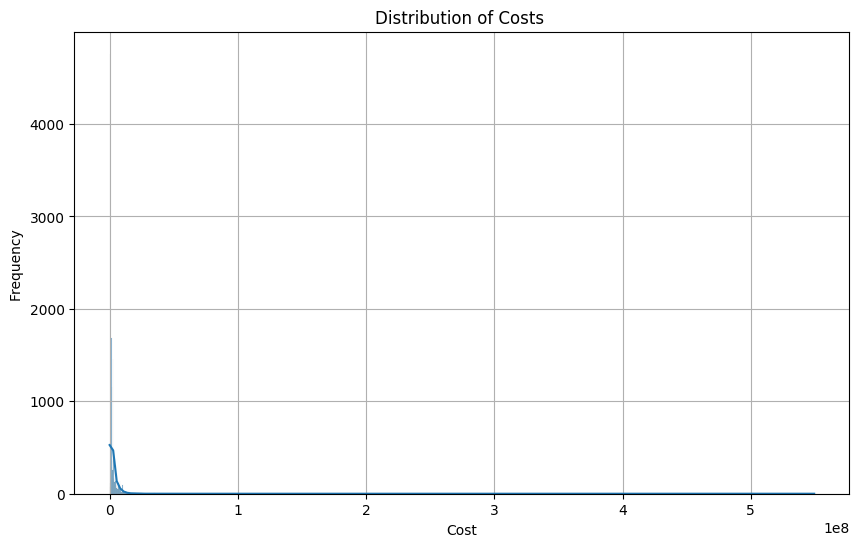

In [150]:
# Again very big outliers
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(fulldf['ecMaxContribution'], kde=True)
plt.title("Distribution of Costs ")
plt.xlabel("Cost")
plt.ylabel("Frequency ")
plt.grid(True)
plt.show()

(15284, 162)


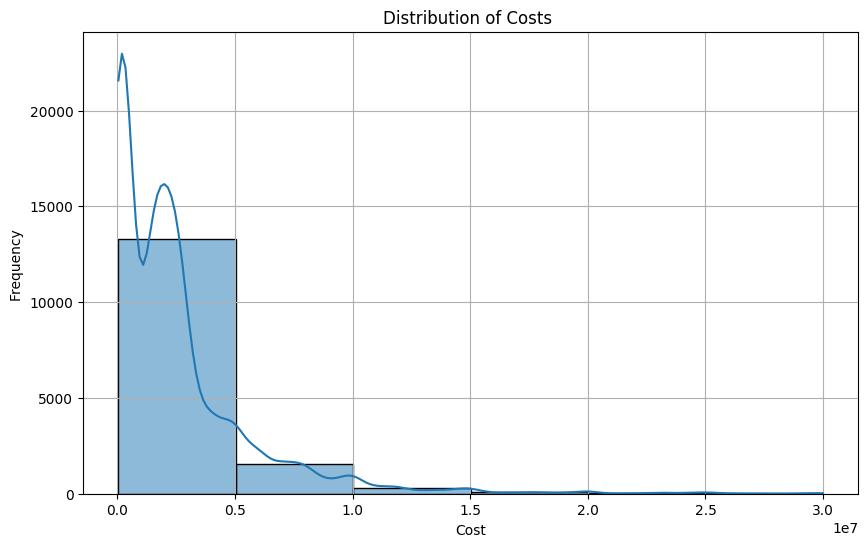

In [151]:
# Only keep projects funding < 30 000 000 for now
# only 54 projects with funding > 30 000 000
# Biggest Majority of the projects have funding < 5000000
fulldf30 = fulldf[fulldf["ecMaxContribution"] < 30000000]
print(fulldf30.shape)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(fulldf30['ecMaxContribution'], binwidth=5000000, kde=True)
plt.title("Distribution of Costs ")
plt.xlabel("Cost")
plt.ylabel("Frequency ")
plt.grid(True)
plt.show()

(13272, 162)


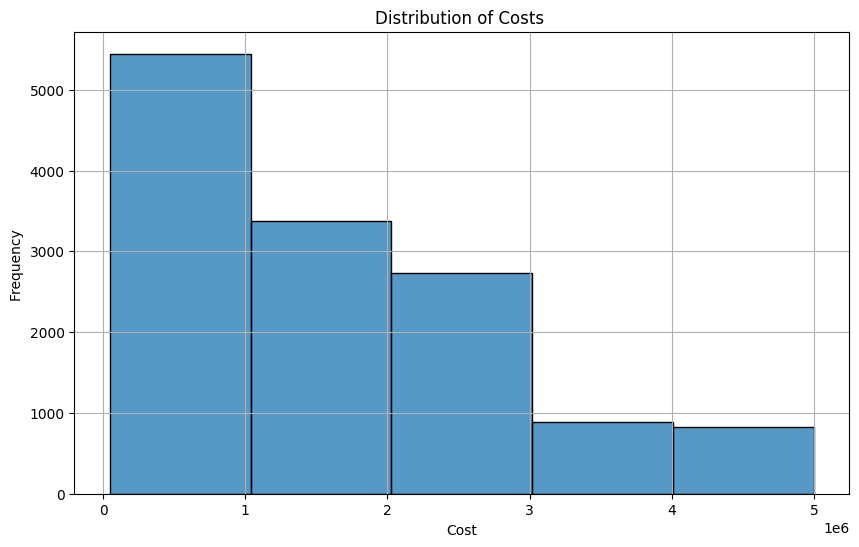

In [152]:
# Only keep projects funding < 5000000 for now
# Seems to be better for the ML training
fulldf5 = fulldf[fulldf["ecMaxContribution"] < 5000000]
print(fulldf5.shape)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(fulldf5['ecMaxContribution'], binwidth=1000000)
plt.title("Distribution of Costs ")
plt.xlabel("Cost")
plt.ylabel("Frequency ")
plt.grid(True)
plt.show()

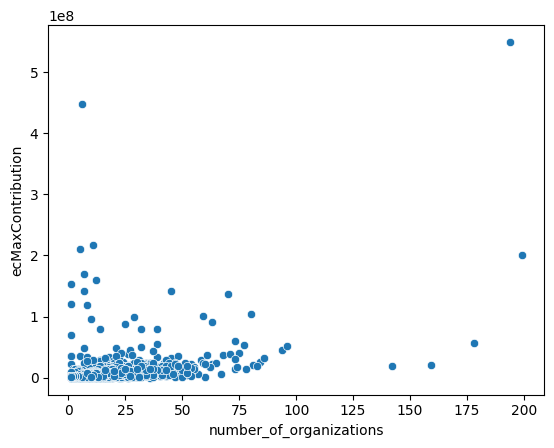

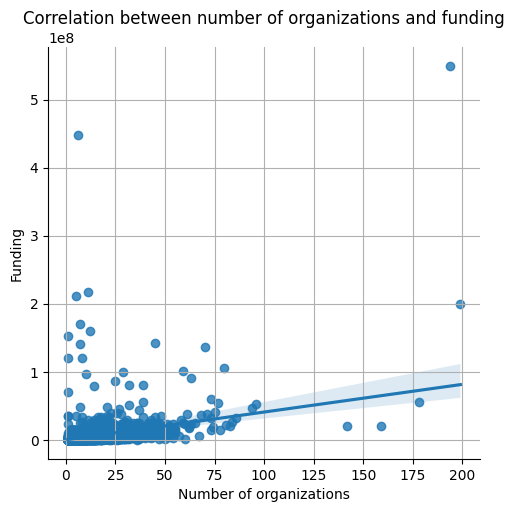

                         ecMaxContribution  number_of_organizations
ecMaxContribution                     1.00                     0.45
number_of_organizations               0.45                     1.00


In [153]:

# Check corr, ecMaxContribution and number_of_organizations
sns.scatterplot(x="number_of_organizations", y="ecMaxContribution", data=fulldf)
sns.lmplot(x="number_of_organizations", y="ecMaxContribution", data=fulldf)
plt.title("Correlation between number of organizations and funding")
plt.xlabel("Number of organizations")
plt.ylabel("Funding")
plt.grid(True)
plt.show()
print(fulldf[["ecMaxContribution", "number_of_organizations"]].corr())

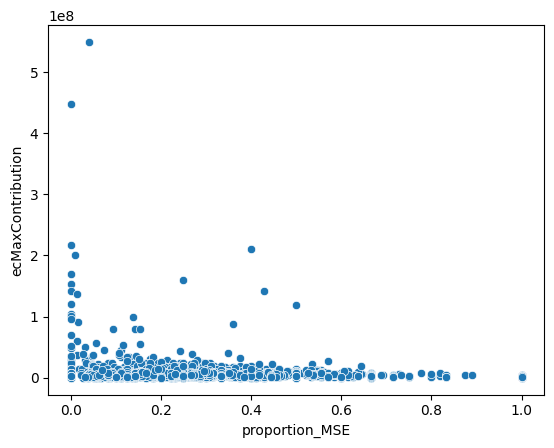

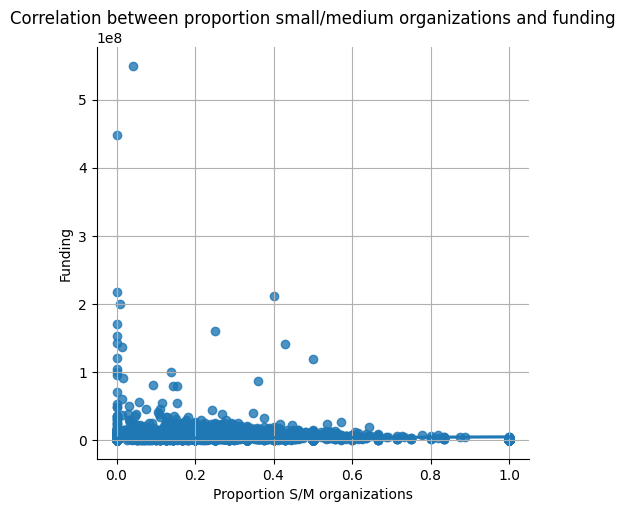

                         proportion_MSE  number_of_organizations
proportion_MSE                     1.00                     0.14
number_of_organizations            0.14                     1.00


In [154]:
# Check corr, ecMaxContribution and proportion_MSE, smaller cor (0.13 for small dataset (0.14 full df), expected negative sign)
sns.scatterplot(x="proportion_MSE", y="ecMaxContribution", data=fulldf)
sns.lmplot(x="proportion_MSE", y="ecMaxContribution", data=fulldf)
plt.title("Correlation between proportion small/medium organizations and funding")
plt.xlabel("Proportion S/M organizations")
plt.ylabel("Funding")
plt.grid(True)
plt.show()
print(fulldf[["proportion_MSE", "number_of_organizations"]].corr())

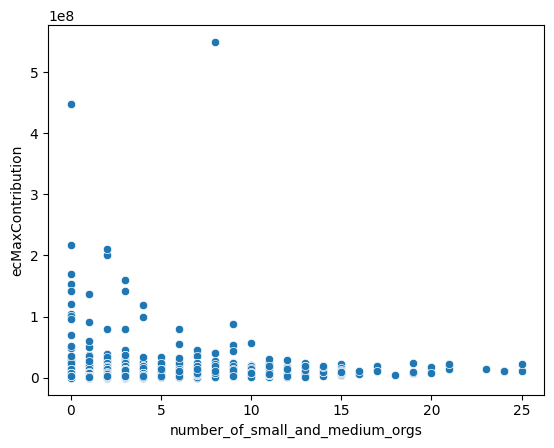

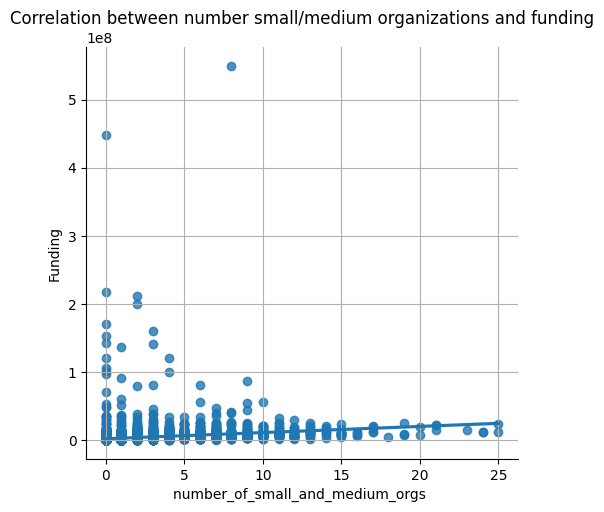

                                 number_of_small_and_medium_orgs  \
number_of_small_and_medium_orgs                             1.00   
ecMaxContribution                                           0.25   

                                 ecMaxContribution  
number_of_small_and_medium_orgs               0.25  
ecMaxContribution                             1.00  


In [155]:
# Check corr, ecMaxContribution and number of MSE, less corr than number of organizations (as expected). 
# Since proportion SME seems not to be very informative, we can drop it
sns.scatterplot(x="number_of_small_and_medium_orgs", y="ecMaxContribution", data=fulldf)
sns.lmplot(x="number_of_small_and_medium_orgs", y="ecMaxContribution", data=fulldf)
plt.title("Correlation between number small/medium organizations and funding")
plt.xlabel("number_of_small_and_medium_orgs ")
plt.ylabel("Funding")
plt.grid(True)
plt.show()
print(fulldf[["number_of_small_and_medium_orgs", "ecMaxContribution"]].corr())

# Al these plots indicate mean>median, meaning very big outliers to the right and so a right skewed dataset

C:\Users\kian3\AppData\Local\Temp\ipykernel_13264\731932259.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="Europe", y="ecMaxContribution", ci=None)


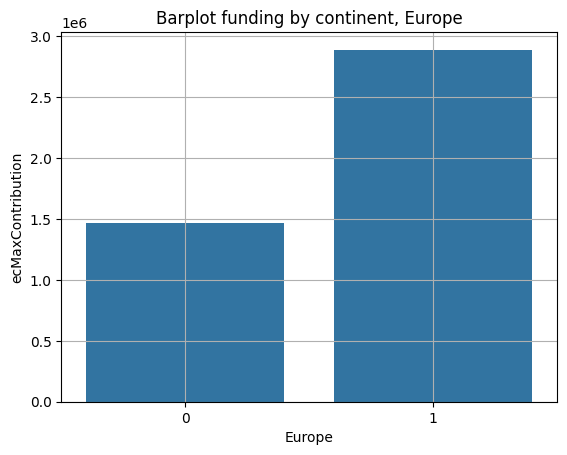

C:\Users\kian3\AppData\Local\Temp\ipykernel_13264\731932259.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="Europe", y="ecMaxContribution", ci=None, estimator="median")


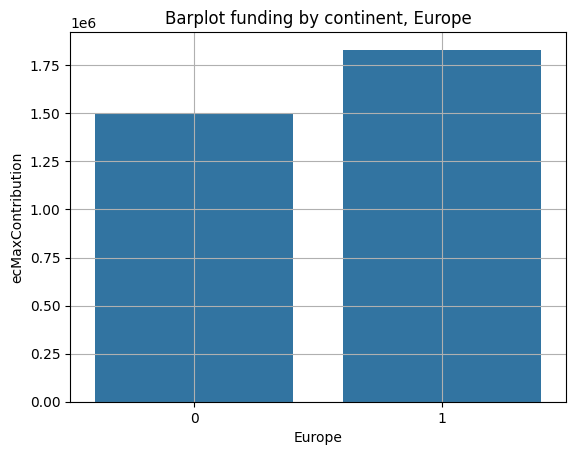

In [156]:
# Mean difference of 190 000, small dataset
# No median difference, outliers to the right in Europe case
sns.barplot(data=fulldf, x="Europe", y="ecMaxContribution", ci=None)
plt.title("Barplot funding by continent, Europe")
plt.xlabel("Europe")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

sns.barplot(data=fulldf, x="Europe", y="ecMaxContribution", ci=None, estimator="median")
plt.title("Barplot funding by continent, Europe")
plt.xlabel("Europe")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

C:\Users\kian3\AppData\Local\Temp\ipykernel_13264\256045126.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="North America", y="ecMaxContribution", ci=None)


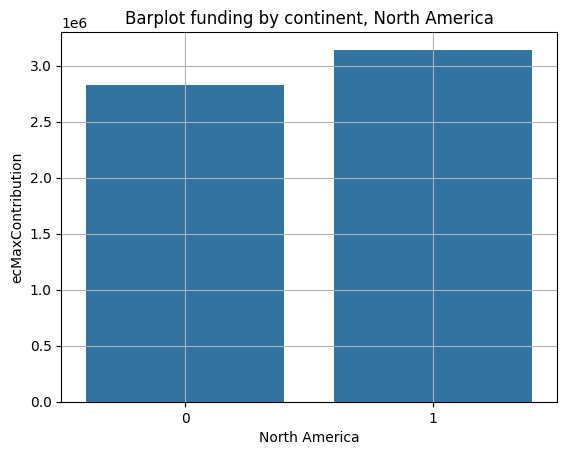

C:\Users\kian3\AppData\Local\Temp\ipykernel_13264\256045126.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="North America", y="ecMaxContribution", ci=None, estimator="median")


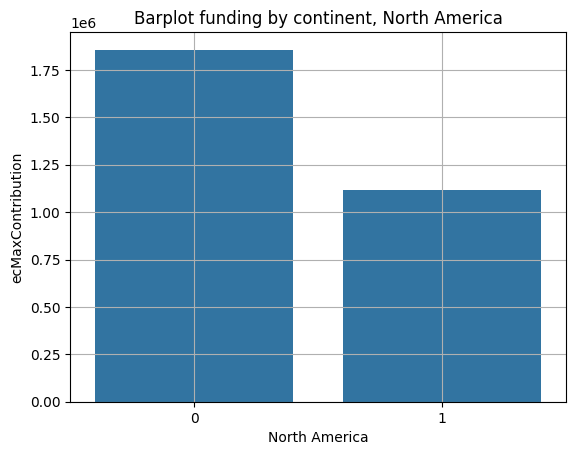

In [157]:
# Lower median for North America
# Big difference mean/median, North Americea has a lot of outliers
sns.barplot(data=fulldf, x="North America", y="ecMaxContribution", ci=None)
plt.title("Barplot funding by continent, North America")
plt.xlabel("North America")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

sns.barplot(data=fulldf, x="North America", y="ecMaxContribution", ci=None, estimator="median")
plt.title("Barplot funding by continent, North America")
plt.xlabel("North America")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

C:\Users\kian3\AppData\Local\Temp\ipykernel_13264\2169848761.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="Asia", y="ecMaxContribution", ci=None)


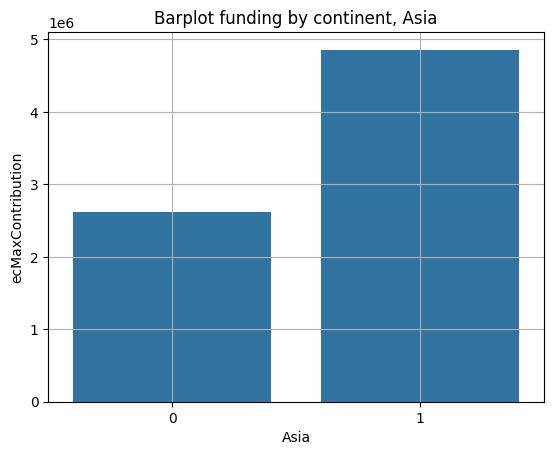

C:\Users\kian3\AppData\Local\Temp\ipykernel_13264\2169848761.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="Asia", y="ecMaxContribution", ci=None, estimator="median")


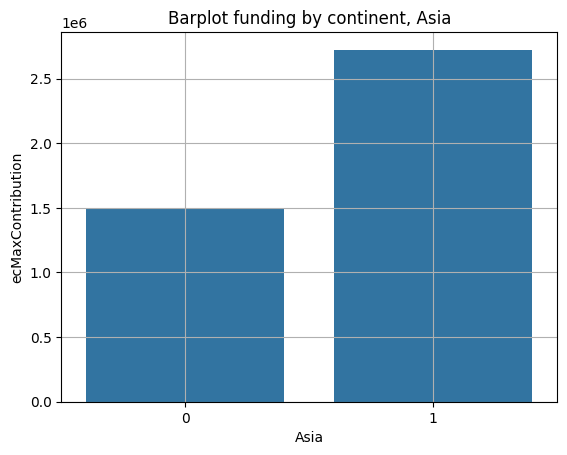

In [158]:
# Mean bit higher than median for Asian involvment, higher funding when Asia is involved (higher than Europe and North America)
sns.barplot(data=fulldf, x="Asia", y="ecMaxContribution", ci=None)
plt.title("Barplot funding by continent, Asia")
plt.xlabel("Asia")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

sns.barplot(data=fulldf, x="Asia", y="ecMaxContribution", ci=None, estimator="median")
plt.title("Barplot funding by continent, Asia")
plt.xlabel("Asia")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

C:\Users\kian3\AppData\Local\Temp\ipykernel_13264\781215448.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="Oceania", y="ecMaxContribution", ci=None)


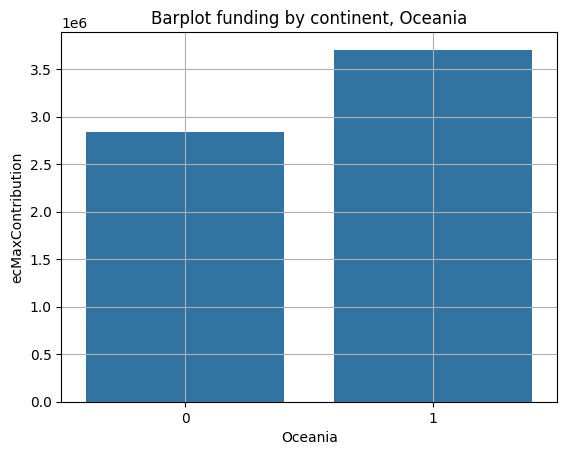

C:\Users\kian3\AppData\Local\Temp\ipykernel_13264\781215448.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="Oceania", y="ecMaxContribution", ci=None, estimator="median")


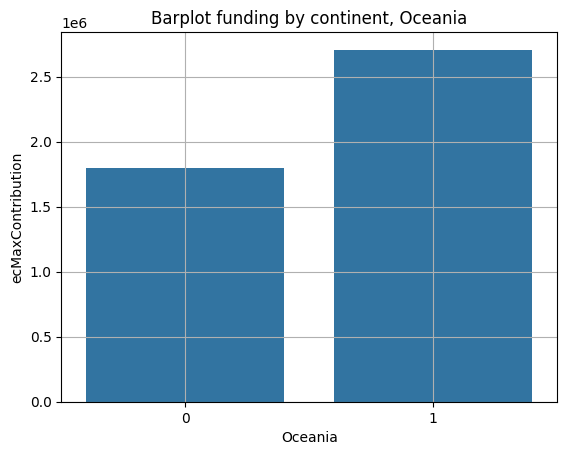

In [159]:
# No difference in median, mean is a bit higher for Oceanian involvment
# Outliers for Oceanian involvment group
sns.barplot(data=fulldf, x="Oceania", y="ecMaxContribution", ci=None)
plt.title("Barplot funding by continent, Oceania")
plt.xlabel("Oceania")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

sns.barplot(data=fulldf, x="Oceania", y="ecMaxContribution", ci=None, estimator="median")
plt.title("Barplot funding by continent, Oceania")
plt.xlabel("Oceania")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

C:\Users\kian3\AppData\Local\Temp\ipykernel_13264\12477514.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="Africa", y="ecMaxContribution", ci=None)


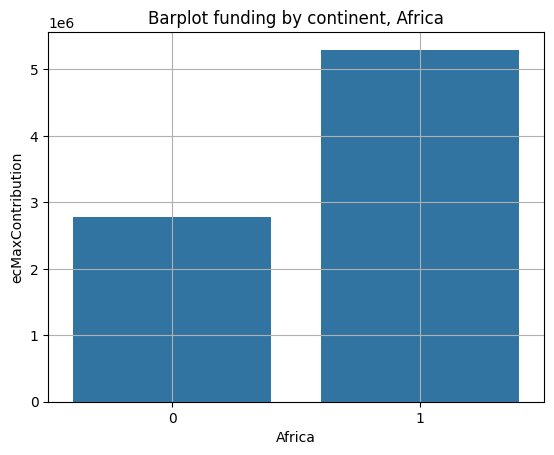

C:\Users\kian3\AppData\Local\Temp\ipykernel_13264\12477514.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="Africa", y="ecMaxContribution", ci=None, estimator="median")


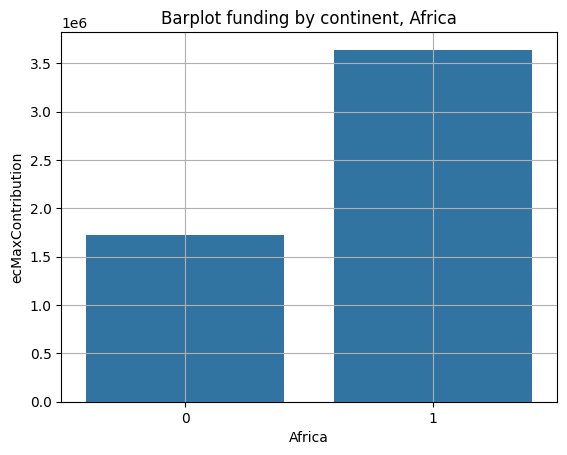

In [160]:
# Highest median for Africa
# Mean/median difference is small
sns.barplot(data=fulldf, x="Africa", y="ecMaxContribution", ci=None)
plt.title("Barplot funding by continent, Africa")
plt.xlabel("Africa")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

sns.barplot(data=fulldf, x="Africa", y="ecMaxContribution", ci=None, estimator="median")
plt.title("Barplot funding by continent, Africa")
plt.xlabel("Africa")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

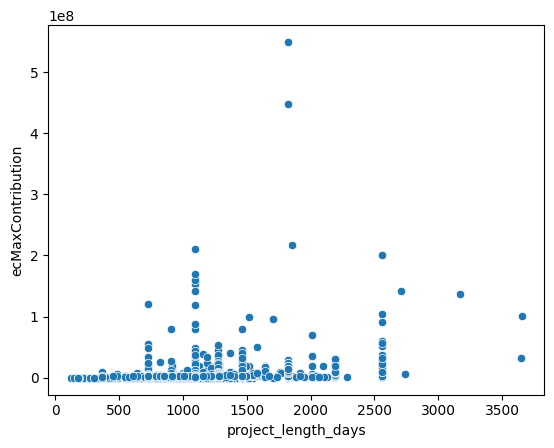

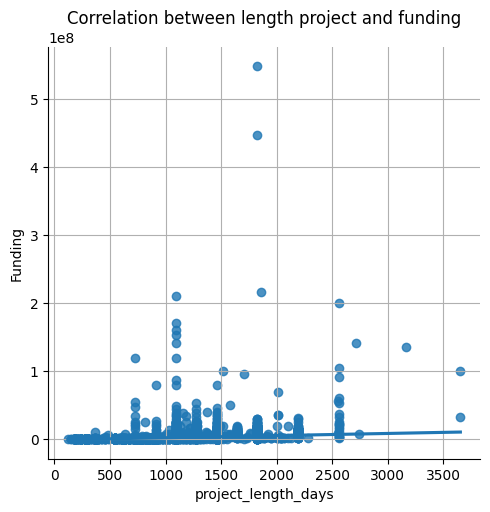

                     project_length_days  ecMaxContribution
project_length_days                 1.00               0.18
ecMaxContribution                   0.18               1.00


In [161]:
# Seems to be a correlation between project length and funding (especially small dataset)
sns.scatterplot(x="project_length_days", y="ecMaxContribution", data=fulldf)
sns.lmplot(x="project_length_days", y="ecMaxContribution", data=fulldf)
plt.title("Correlation between length project and funding")
plt.xlabel("project_length_days")
plt.ylabel("Funding")
plt.grid(True)
plt.show()
print(fulldf[["project_length_days", "ecMaxContribution"]].corr())

In [ ]:
# prepare for ML, nan will dissapear once the country=NaN for NA has been fixed
# nan is fixed, less col's because grouped domains 
drop_cols = ['id','status', 'startDate', 'endDate', 'legalBasis','fundingScheme','objective_y','main_topics', 'scientific_domain', 'number_of_small_and_medium_orgs','proportion_MSE', \
            'all_continents', 'problem_type', 'expected_impact', 'semantic_summary']


fulldf = fulldf.drop(columns=drop_cols)
print(fulldf.columns)

Index(['ecMaxContribution', 'sustainability', 'project_length_days',
       'fundamental research', 'applied research', 'translational research',
       'confidential', 'societal_impact', 'economic_impact',
       'technological_impact',
       ...
       'literature_domain', 'cognitive science_domain', 'confidential_domain',
       'number_of_organizations', 'Europe', 'North America', 'Asia',
       'South America', 'Africa', 'Oceania'],
      dtype='object', length=147)


In [163]:
fulldf["sustainability"] = fulldf["sustainability"].astype(int)

# Model Building

In [164]:
print(fulldf["ecMaxContribution"].describe())

count       15338.00
mean      2851686.37
std       8314247.50
min         46594.00
25%        211754.88
50%       1808235.50
75%       2999996.12
max     549442000.00
Name: ecMaxContribution, dtype: float64


C:\Users\kian3\AppData\Local\Temp\ipykernel_13264\1219622760.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fulldf["log_ecMaxContribution"] = np.log(fulldf["ecMaxContribution"])


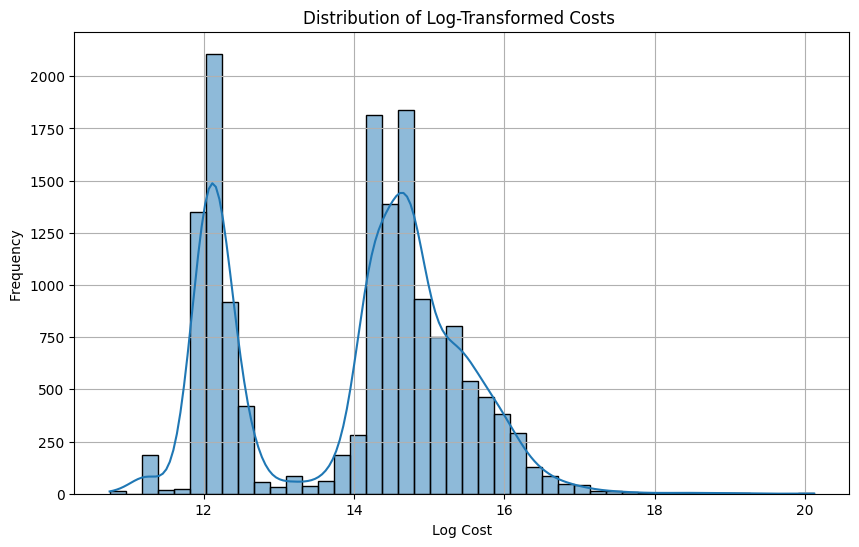

In [165]:
# Perform log transformation on the target variable
fulldf["log_ecMaxContribution"] = np.log(fulldf["ecMaxContribution"])
# Check the distribution of the log-transformed target variable
plt.figure(figsize=(10, 6))
sns.histplot(fulldf['log_ecMaxContribution'], kde=True)
plt.title("Distribution of Log-Transformed Costs ")
plt.xlabel("Log Cost")
plt.ylabel("Frequency ")
plt.grid(True)
plt.show()

In [169]:
1372561.81/488733.5206039573
8314247.50/4011578.339784923
8314247.50/3769931.392186167

2.205410824513335

In [ ]:
# Non transformation:std= 1372561.81, RMSE on test set = 488733.5206039573 (dropped with 2.81), when done on the small dataset
# Non transformation: std = 8314247.50, RMSE on test set = 4011578.339784923 (dropped with 2.21), when done on the full dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Integer

X = fulldf.drop(columns=["ecMaxContribution", 'log_ecMaxContribution'])
y = fulldf["log_ecMaxContribution"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

bayes_search = BayesSearchCV(
    XGBRegressor(objective="reg:squarederror", random_state=42),
    search_spaces={
        'n_estimators': Integer(50, 300),
        'max_depth': Integer(3, 10),
        'learning_rate': Real(0.005, 0.5, prior='log-uniform'),
        'subsample': Real(0.6, 1.0),
        'colsample_bytree': Real(0.6, 1.0),
        'gamma': Real(0.0, 0.5),
        'reg_alpha': Real(0.0, 1.0),
        'reg_lambda': Real(0.0, 1.0),
    },
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=0
)
bayes_search.fit(X_train, y_train)
bayes_best = bayes_search.best_estimator_

print("Bayes Search Best CV score (neg_MSE):", bayes_search.best_score_)
print("Bayes Search Best CV score (RMSE):", np.sqrt(-bayes_search.best_score_))

bayes_preds_log = bayes_best.predict(X_test)
# Inverse the log transformation to get the original scale
bayes_preds = np.exp(bayes_preds_log)
# Inverse the log transformation to get the original scale for y_test
y_test_exp = np.exp(y_test)
# Calculate the MAE, MSE, and RMSE on the test set
bayes_mae = mean_absolute_error(y_test_exp, bayes_preds)
bayes_mse = mean_squared_error(y_test_exp, bayes_preds) 
bayes_rmse = np.sqrt(bayes_mse)
print("Bayes Search Test MAE:", bayes_mae)
print("Bayes Search Test MSE:", bayes_mse)
print("Bayes Search Test RMSE:", bayes_rmse)

Bayes Search Best CV score (neg_MSE): -0.10180875266086042
Bayes Search Best CV score (RMSE): 0.31907483865209496
Bayes Search Test MAE: 781727.6268052477
Bayes Search Test MSE: 14212382701790.732
Bayes Search Test RMSE: 3769931.392186167


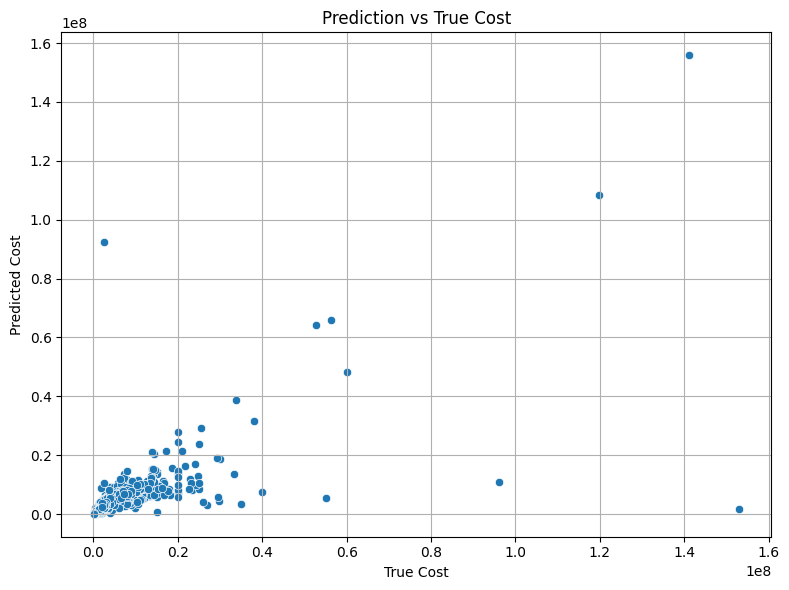

Correlation between True Cost and Predicted Cost: 0.54


In [170]:
# corr=0.93 for small dataset, 0.71 for full dataset
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_exp, y=bayes_preds)
plt.xlabel("True Cost")
plt.ylabel("Predicted Cost")
plt.title(f"Prediction vs True Cost")
plt.grid(True)
plt.tight_layout()
plt.show()
correlation = np.corrcoef(y_test, bayes_preds)[0, 1]
print(f"Correlation between True Cost and Predicted Cost: {correlation:.2f}")

In [171]:
# Funding programme seems important (maybe we can group them, see beneath Hin HORIZON for example, to use less cat's)
fi = pd.DataFrame({
  "feature": X_train.columns,
  "importance": bayes_best.feature_importances_
}).sort_values("importance", ascending=False)
print(fi)

                    feature  importance
49   HORIZON-TMA-MSCA-PF-GF        0.21
65       HORIZON-EIC-ACC-BF        0.15
45   HORIZON-TMA-MSCA-PF-EF        0.09
1       project_length_days        0.09
56            HORIZON-AG-LS        0.08
..                      ...         ...
120        photonics_domain        0.00
136       literature_domain        0.00
134        astronomy_domain        0.00
132       biophysics_domain        0.00
138     confidential_domain        0.00

[146 rows x 2 columns]


In [ ]:
# Bad performance, try outlier removal method based on IQR
# min>10 and max higher than 20. Given these treshold only the very big outliers are removed (no small ones, which is good)
# Only 7 are removed, so not a lot of outliers using this method on the log-transformed data
from scipy.stats import iqr
print(fulldf.shape)
iqr = iqr(fulldf["log_ecMaxContribution"]) 
lower_treshold = np.quantile(fulldf["log_ecMaxContribution"], 0.25) - 1.5*iqr 
upper_treshold = np.quantile(fulldf["log_ecMaxContribution"], 0.75) + 1.5*iqr
print(f"Lower treshold: {lower_treshold}, Upper treshold: {upper_treshold}")
# Identify outliers 
outliers = fulldf[(fulldf["log_ecMaxContribution"]<lower_treshold) | (fulldf["log_ecMaxContribution"] > upper_treshold)]
df_no_outliers = fulldf[((fulldf["log_ecMaxContribution"]>lower_treshold) & (fulldf["log_ecMaxContribution"] < upper_treshold))]
print(f"Remaining rows after outlier removal: {len(df_no_outliers)}")

(15338, 148)
Lower treshold: 8.2867793132867, Upper treshold: 18.89052689997179
Remaining rows after outlier removal: 15331


In [174]:
fulldf["log_ecMaxContribution"].describe()


count   15338.00
mean       13.97
std         1.44
min        10.75
25%        12.26
50%        14.41
75%        14.91
max        20.12
Name: log_ecMaxContribution, dtype: float64

In [ ]:
# After outlier removal, RMSE dropped to 3211284.6411182117, std= 4992293.30 so still bad

X = df_no_outliers.drop(columns=["ecMaxContribution", 'log_ecMaxContribution'])
y = df_no_outliers["log_ecMaxContribution"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

bayes_search = BayesSearchCV(
    XGBRegressor(objective="reg:squarederror", random_state=42),
    search_spaces={
        'n_estimators': Integer(50, 300),
        'max_depth': Integer(3, 10),
        'learning_rate': Real(0.005, 0.5, prior='log-uniform'),
        'subsample': Real(0.6, 1.0),
        'colsample_bytree': Real(0.6, 1.0),
        'gamma': Real(0.0, 0.5),
        'reg_alpha': Real(0.0, 1.0),
        'reg_lambda': Real(0.0, 1.0),
    },
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=0
)
bayes_search.fit(X_train, y_train)
bayes_best = bayes_search.best_estimator_

print("Bayes Search Best CV score (neg_MSE):", bayes_search.best_score_)
print("Bayes Search Best CV score (RMSE):", np.sqrt(-bayes_search.best_score_))

bayes_preds_log = bayes_best.predict(X_test)
# Inverse the log transformation to get the original scale
bayes_preds = np.exp(bayes_preds_log)
# Inverse the log transformation to get the original scale for y_test
y_test_exp = np.exp(y_test)
# Calculate the MAE, MSE, and RMSE on the test set
bayes_mae = mean_absolute_error(y_test_exp, bayes_preds)
bayes_mse = mean_squared_error(y_test_exp, bayes_preds) 
bayes_rmse = np.sqrt(bayes_mse)
print("Bayes Search Test MAE:", bayes_mae)
print("Bayes Search Test MSE:", bayes_mse)
print("Bayes Search Test RMSE:", bayes_rmse)

Bayes Search Best CV score (neg_MSE): -0.10422895075371283
Bayes Search Best CV score (RMSE): 0.3228450878574937
Bayes Search Test MAE: 754914.3758874412
Bayes Search Test MSE: 10312349046281.72
Bayes Search Test RMSE: 3211284.6411182117


In [177]:
df_no_outliers["ecMaxContribution"].describe()

count       15331.00
mean      2725389.87
std       4992293.30
min         46594.00
25%        211754.88
50%       1805636.14
75%       2999990.62
max     153000000.00
Name: ecMaxContribution, dtype: float64

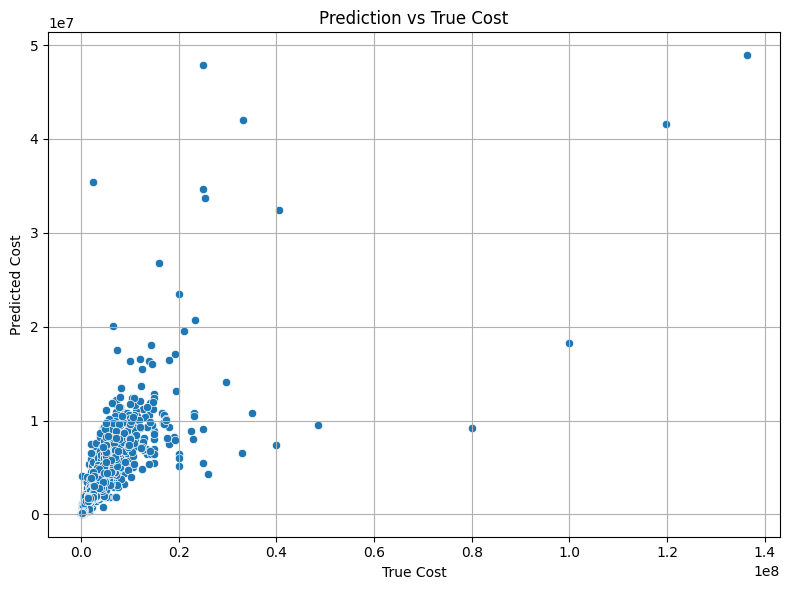

Correlation between True Cost and Predicted Cost: 0.72


In [ ]:
# We still see for high funding the predictions are very bad. 
# I'm gonna try outlier detection on the original data and then log transform the funding amount
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_exp, y=bayes_preds)
plt.xlabel("True Cost")
plt.ylabel("Predicted Cost")
plt.title(f"Prediction vs True Cost")
plt.grid(True)
plt.tight_layout()
plt.show()
correlation = np.corrcoef(y_test, bayes_preds)[0, 1]
print(f"Correlation between True Cost and Predicted Cost: {correlation:.2f}")

In [ ]:
# This is much more abrupt, leaving out 1205 projects
from scipy.stats import iqr
print(fulldf.shape)
iqr = iqr(fulldf["ecMaxContribution"]) 
lower_treshold = np.quantile(fulldf["ecMaxContribution"], 0.25) - 1.5*iqr 
upper_treshold = np.quantile(fulldf["ecMaxContribution"], 0.75) + 1.5*iqr
print(f"Lower treshold: {lower_treshold}, Upper treshold: {upper_treshold}")
# Identify outliers 
outliers = fulldf[(fulldf["ecMaxContribution"]<lower_treshold) | (fulldf["ecMaxContribution"] > upper_treshold)]
df_no_outliers = fulldf[((fulldf["ecMaxContribution"]>lower_treshold) & (fulldf["ecMaxContribution"] < upper_treshold))]
print(f"Remaining rows after outlier removal: {len(df_no_outliers)}")

(15338, 148)
Lower treshold: -3970606.9875000003, Upper treshold: 7182357.9925
Remaining rows after outlier removal: 14133


In [180]:
fulldf["ecMaxContribution"].describe()

count       15338.00
mean      2851686.37
std       8314247.50
min         46594.00
25%        211754.88
50%       1808235.50
75%       2999996.12
max     549442000.00
Name: ecMaxContribution, dtype: float64

In [ ]:
# std = 1716306.32, RMSE = 619957.1020476681
X = df_no_outliers.drop(columns=["ecMaxContribution", 'log_ecMaxContribution'])
y = df_no_outliers["log_ecMaxContribution"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

bayes_search = BayesSearchCV(
    XGBRegressor(objective="reg:squarederror", random_state=42),
    search_spaces={
        'n_estimators': Integer(50, 300),
        'max_depth': Integer(3, 10),
        'learning_rate': Real(0.005, 0.5, prior='log-uniform'),
        'subsample': Real(0.6, 1.0),
        'colsample_bytree': Real(0.6, 1.0),
        'gamma': Real(0.0, 0.5),
        'reg_alpha': Real(0.0, 1.0),
        'reg_lambda': Real(0.0, 1.0),
    },
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=0
)
bayes_search.fit(X_train, y_train)
bayes_best = bayes_search.best_estimator_

print("Bayes Search Best CV score (neg_MSE):", bayes_search.best_score_)
print("Bayes Search Best CV score (RMSE):", np.sqrt(-bayes_search.best_score_))

bayes_preds_log = bayes_best.predict(X_test)
# Inverse the log transformation to get the original scale
bayes_preds = np.exp(bayes_preds_log)
# Inverse the log transformation to get the original scale for y_test
y_test_exp = np.exp(y_test)
# Calculate the MAE, MSE, and RMSE on the test set
bayes_mae = mean_absolute_error(y_test_exp, bayes_preds)
bayes_mse = mean_squared_error(y_test_exp, bayes_preds) 
bayes_rmse = np.sqrt(bayes_mse)
print("Bayes Search Test MAE:", bayes_mae)
print("Bayes Search Test MSE:", bayes_mse)
print("Bayes Search Test RMSE:", bayes_rmse)

Bayes Search Best CV score (neg_MSE): -0.06958957956343581
Bayes Search Best CV score (RMSE): 0.2637983691447614
Bayes Search Test MAE: 362323.44136212504
Bayes Search Test MSE: 384346808379.34265
Bayes Search Test RMSE: 619957.1020476681


In [182]:
df_no_outliers["ecMaxContribution"].describe()

count     14133.00
mean    1849908.66
std     1716306.32
min       46594.00
25%      203464.32
50%     1500000.00
75%     2533216.00
max     7168901.00
Name: ecMaxContribution, dtype: float64

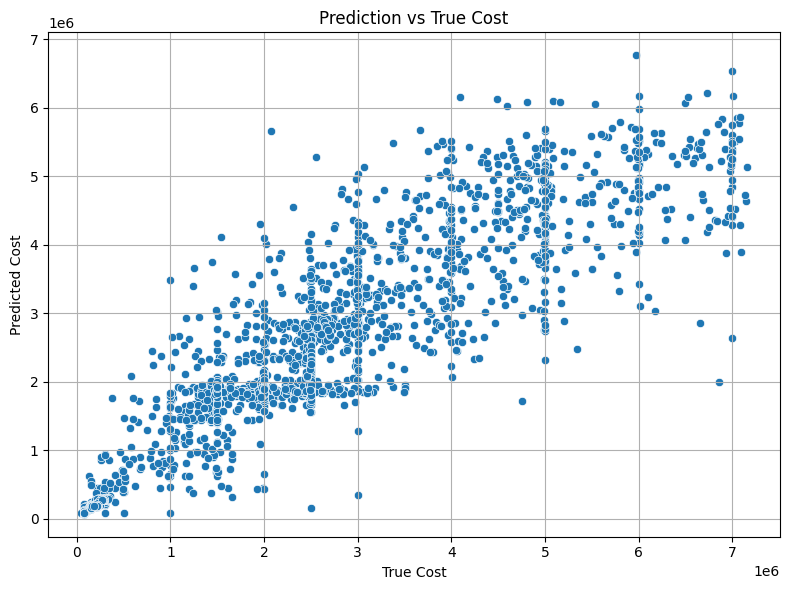

Correlation between True Cost and Predicted Cost: 0.89


In [183]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_exp, y=bayes_preds)
plt.xlabel("True Cost")
plt.ylabel("Predicted Cost")
plt.title(f"Prediction vs True Cost")
plt.grid(True)
plt.tight_layout()
plt.show()
correlation = np.corrcoef(y_test, bayes_preds)[0, 1]
print(f"Correlation between True Cost and Predicted Cost: {correlation:.2f}")

In [ ]:
# Orginal data without outliers, not log-transformed
# Same performance as the log-transformed data +-, 611834.4846171364
X = df_no_outliers.drop(columns=["ecMaxContribution", 'log_ecMaxContribution'])
y = df_no_outliers["ecMaxContribution"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

bayes_search = BayesSearchCV(
    XGBRegressor(objective="reg:squarederror", random_state=42),
    search_spaces={
        'n_estimators': Integer(50, 300),
        'max_depth': Integer(3, 10),
        'learning_rate': Real(0.005, 0.5, prior='log-uniform'),
        'subsample': Real(0.6, 1.0),
        'colsample_bytree': Real(0.6, 1.0),
        'gamma': Real(0.0, 0.5),
        'reg_alpha': Real(0.0, 1.0),
        'reg_lambda': Real(0.0, 1.0),
    },
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=0
)
bayes_search.fit(X_train, y_train)
bayes_best = bayes_search.best_estimator_

print("Bayes Search Best CV score (neg_MSE):", bayes_search.best_score_)
print("Bayes Search Best CV score (RMSE):", np.sqrt(-bayes_search.best_score_))

bayes_preds = bayes_best.predict(X_test)
# Calculate the MAE, MSE, and RMSE on the test set
bayes_mae = mean_absolute_error(y_test_exp, bayes_preds)
bayes_mse = mean_squared_error(y_test_exp, bayes_preds) 
bayes_rmse = np.sqrt(bayes_mse)
print("Bayes Search Test MAE:", bayes_mae)
print("Bayes Search Test MSE:", bayes_mse)
print("Bayes Search Test RMSE:", bayes_rmse)

Bayes Search Best CV score (neg_MSE): -379621746656.55505
Bayes Search Best CV score (RMSE): 616134.5199358294
Bayes Search Test MAE: 366072.4088065046
Bayes Search Test MSE: 374341436566.717
Bayes Search Test RMSE: 611834.4846171364


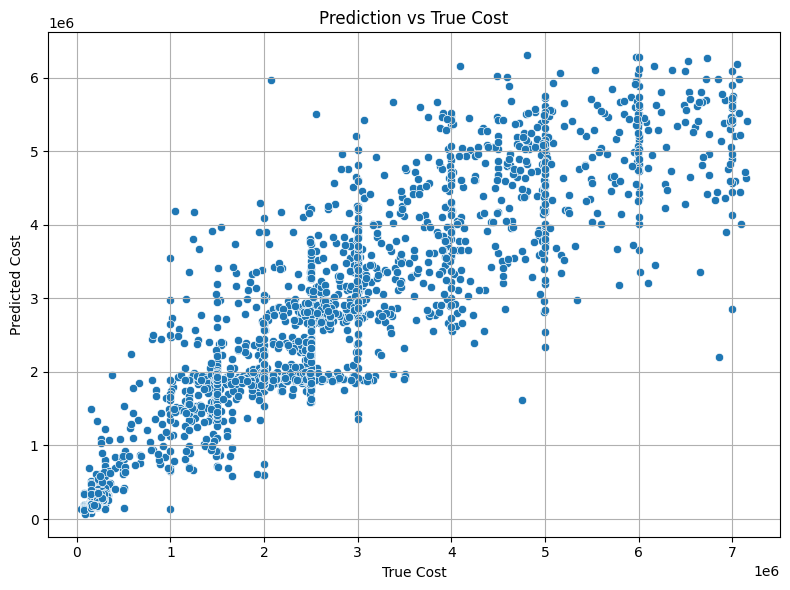

Correlation between True Cost and Predicted Cost: 0.93


In [185]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_exp, y=bayes_preds)
plt.xlabel("True Cost")
plt.ylabel("Predicted Cost")
plt.title(f"Prediction vs True Cost")
plt.grid(True)
plt.tight_layout()
plt.show()
correlation = np.corrcoef(y_test, bayes_preds)[0, 1]
print(f"Correlation between True Cost and Predicted Cost: {correlation:.2f}")

In [186]:
fi = pd.DataFrame({
  "feature": X_train.columns,
  "importance": bayes_best.feature_importances_
}).sort_values("importance", ascending=False)
fi

,feature,importance
45,HORIZON-TMA-MSCA-PF-EF,0.09
49,HORIZON-TMA-MSCA-PF-GF,0.09
57,HORIZON-ERC-POC,0.07
50,HORIZON-TMA-MSCA-SE,0.07
65,HORIZON-EIC-ACC-BF,0.07
...,...,...
26,linguistic_impact,0.00
21,confidential_impact,0.00
20,fundamentalresearch_impact,0.00
125,genetics_domain,0.00


In [187]:
fi.to_csv("bayes_feature_importance.csv", index=False)

In [189]:
# Drop feautures with importance=0
drop_cols = ['educational_impact', 'policy_impact', 'globalsecurity_impact', 'confidential', 'EIC', 'EURATOM-COFUND', 'clinical_impact', 'historical_impact' \
            ,'applied_impact', 'biological_impact', 'unknown scheme', 'linguistic_impact', \
            'confidential_impact', 'fundamentalresearch_impact', 'genetics_domain', \
            'confidential_domain']
df_no_outliers = df_no_outliers.drop(columns=drop_cols)


In [190]:
# Orginal data without outliers, not log-transformed
# Same performance as the log-transformed data +-, 611834.4846171364
X = df_no_outliers.drop(columns=["ecMaxContribution", 'log_ecMaxContribution'])
y = df_no_outliers["ecMaxContribution"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

bayes_search = BayesSearchCV(
    XGBRegressor(objective="reg:squarederror", random_state=42),
    search_spaces={
        'n_estimators': Integer(50, 300),
        'max_depth': Integer(3, 10),
        'learning_rate': Real(0.005, 0.5, prior='log-uniform'),
        'subsample': Real(0.6, 1.0),
        'colsample_bytree': Real(0.6, 1.0),
        'gamma': Real(0.0, 0.5),
        'reg_alpha': Real(0.0, 1.0),
        'reg_lambda': Real(0.0, 1.0),
    },
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=0
)
bayes_search.fit(X_train, y_train)
bayes_best = bayes_search.best_estimator_

print("Bayes Search Best CV score (neg_MSE):", bayes_search.best_score_)
print("Bayes Search Best CV score (RMSE):", np.sqrt(-bayes_search.best_score_))

bayes_preds = bayes_best.predict(X_test)
# Calculate the MAE, MSE, and RMSE on the test set
bayes_mae = mean_absolute_error(y_test_exp, bayes_preds)
bayes_mse = mean_squared_error(y_test_exp, bayes_preds) 
bayes_rmse = np.sqrt(bayes_mse)
print("Bayes Search Test MAE:", bayes_mae)
print("Bayes Search Test MSE:", bayes_mse)
print("Bayes Search Test RMSE:", bayes_rmse)

Bayes Search Best CV score (neg_MSE): -381018248771.8885
Bayes Search Best CV score (RMSE): 617266.7565744072
Bayes Search Test MAE: 367958.4739337507
Bayes Search Test MSE: 374905633325.1126
Bayes Search Test RMSE: 612295.3807804796


In [191]:
fi = pd.DataFrame({
  "feature": X_train.columns,
  "importance": bayes_best.feature_importances_
}).sort_values("importance", ascending=False)
fi
fi.to_csv("bayes_feature_importance.csv", index=False)

In [192]:
# Drop feautures with importance=0
drop_cols = ["anthropology_domain", "business_impact", "translational_impact", "microbiology_domain", "sociology_domain", "literature_domain", "cognitive science_domain"]
df_no_outliers = df_no_outliers.drop(columns=drop_cols)

In [193]:
X = df_no_outliers.drop(columns=["ecMaxContribution", 'log_ecMaxContribution'])
y = df_no_outliers["ecMaxContribution"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

bayes_search = BayesSearchCV(
    XGBRegressor(objective="reg:squarederror", random_state=42),
    search_spaces={
        'n_estimators': Integer(50, 300),
        'max_depth': Integer(3, 10),
        'learning_rate': Real(0.005, 0.5, prior='log-uniform'),
        'subsample': Real(0.6, 1.0),
        'colsample_bytree': Real(0.6, 1.0),
        'gamma': Real(0.0, 0.5),
        'reg_alpha': Real(0.0, 1.0),
        'reg_lambda': Real(0.0, 1.0),
    },
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=0
)
bayes_search.fit(X_train, y_train)
bayes_best = bayes_search.best_estimator_

print("Bayes Search Best CV score (neg_MSE):", bayes_search.best_score_)
print("Bayes Search Best CV score (RMSE):", np.sqrt(-bayes_search.best_score_))

bayes_preds = bayes_best.predict(X_test)
# Calculate the MAE, MSE, and RMSE on the test set
bayes_mae = mean_absolute_error(y_test_exp, bayes_preds)
bayes_mse = mean_squared_error(y_test_exp, bayes_preds) 
bayes_rmse = np.sqrt(bayes_mse)
print("Bayes Search Test MAE:", bayes_mae)
print("Bayes Search Test MSE:", bayes_mse)
print("Bayes Search Test RMSE:", bayes_rmse)

Bayes Search Best CV score (neg_MSE): -381210708900.0719
Bayes Search Best CV score (RMSE): 617422.6339389186
Bayes Search Test MAE: 367673.00029663846
Bayes Search Test MSE: 376451963958.507
Bayes Search Test RMSE: 613556.813961435


In [195]:
fi = pd.DataFrame({
  "feature": X_train.columns,
  "importance": bayes_best.feature_importances_
}).sort_values("importance", ascending=False)
fi
fi.to_csv("bayes_feature_importance.csv", index=False)

In [196]:

# Drop feautures with importance=0
drop_cols = ["astronomy_domain"]
df_no_outliers = df_no_outliers.drop(columns=drop_cols)

In [197]:
X = df_no_outliers.drop(columns=["ecMaxContribution", 'log_ecMaxContribution'])
y = df_no_outliers["ecMaxContribution"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

bayes_search = BayesSearchCV(
    XGBRegressor(objective="reg:squarederror", random_state=42),
    search_spaces={
        'n_estimators': Integer(50, 300),
        'max_depth': Integer(3, 10),
        'learning_rate': Real(0.005, 0.5, prior='log-uniform'),
        'subsample': Real(0.6, 1.0),
        'colsample_bytree': Real(0.6, 1.0),
        'gamma': Real(0.0, 0.5),
        'reg_alpha': Real(0.0, 1.0),
        'reg_lambda': Real(0.0, 1.0),
    },
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=0
)
bayes_search.fit(X_train, y_train)
bayes_best = bayes_search.best_estimator_

print("Bayes Search Best CV score (neg_MSE):", bayes_search.best_score_)
print("Bayes Search Best CV score (RMSE):", np.sqrt(-bayes_search.best_score_))

bayes_preds = bayes_best.predict(X_test)
# Calculate the MAE, MSE, and RMSE on the test set
bayes_mae = mean_absolute_error(y_test_exp, bayes_preds)
bayes_mse = mean_squared_error(y_test_exp, bayes_preds) 
bayes_rmse = np.sqrt(bayes_mse)
print("Bayes Search Test MAE:", bayes_mae)
print("Bayes Search Test MSE:", bayes_mse)
print("Bayes Search Test RMSE:", bayes_rmse)

Bayes Search Best CV score (neg_MSE): -378526304819.2738
Bayes Search Best CV score (RMSE): 615244.914500944
Bayes Search Test MAE: 370012.6831328934
Bayes Search Test MSE: 373396803426.6371
Bayes Search Test RMSE: 611062.0291154059


In [198]:
fi = pd.DataFrame({
  "feature": X_train.columns,
  "importance": bayes_best.feature_importances_
}).sort_values("importance", ascending=False)
fi
fi.to_csv("bayes_feature_importance.csv", index=False)